In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis

In this section, we thoroughly analyze and understand all the provided datasets before performing any pre-processing and transformations for feature engineering. 

#### For each dataset, we try to answer these fundamental questions first and foremost:

1. What is the shape of the dataset?
2. Are all variable datatypes in the correct format? If not, we will convert them to the required datatype.
3. What values are missing? What columns can we drop?
4. How many unique values are present in each column?
5. What does the data distribution look like for relevant variables?

#### We report the results for the above and also visualize some of the distributions.

In [2]:
account_dim = pd.read_csv('data/account_dim_20250325.csv') #18070 unique account numbers
syf_id = pd.read_csv('data/syf_id_20250325.csv') #18070
rams_batch = pd.read_csv('data/rams_batch_cur_20250325.csv') # 17569
fraud_cases = pd.read_csv('data/fraud_claim_case_20250325.csv') # 77
fraud_trans = pd.read_csv('data/fraud_claim_tran_20250325.csv') #70
transactions = pd.read_csv('data/transaction_fact_20250325.csv') # 14099
world_trans = pd.read_csv('data/wrld_stor_tran_fact_20250325.csv') # 6164
statements = pd.read_csv('data/statement_fact_20250325.csv') #17613

### Cardholders Data

In [3]:
account_dim.head()

,current_account_nbr,client_id,open_date,card_activation_date,card_activation_flag,ebill_ind,date_in_collection,overlimit_type_flag,payment_hist_1_12_mths,payment_hist_13_24_mths,employee_code,external_status_reason_code,special_finance_charge_ind,pscc_ind,ext_status_reason_cd_desc,account_card_type
0,nTgalbpd5Rsol7CA,YCTHAA278DC,2020-07-17T00:00:00.000-04:00,NaN,8,E,NaN,0,ZZZZZZIAZZZZ,ZZZZIIIQIIII,NaN,0,NaN,0,NaN,DUAL CARD
1,xYaLrD9IvmbVl1PB,CCSP489PLCC,2024-07-24T00:00:00.000-04:00,2024-08-09T00:00:00.000-04:00,0,E,NaN,0,IQIIIQIA,"\\\\\\""""",NaN,0,NaN,1,NaN,DUAL CARD
2,JM78WNziiRWgmL8e,HGBHARRFT984,2024-05-05T00:00:00.000-04:00,2024-05-05T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,IIIQIQIIIIA,"\\\\\\""""",NaN,0,NaN,0,NaN,PLCC
3,bv4NLVhWTGCf8KgC,OSELW263,2024-07-28T00:00:00.000-04:00,2024-09-08T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,I1III1A,"\\\\\\""""",NaN,0,NaN,0,NaN,PLCC
4,nrXceQabYIHo31lp,HGBHARRFT984,2024-09-15T00:00:00.000-04:00,2024-09-15T00:00:00.000-04:00,0,"\\\\\\""""",NaN,0,"\\\\\\""""","\\\\\\""""",NaN,0,NaN,0,NaN,PLCC


In [4]:
print("Total rows and columns: ",  account_dim.shape)
print("\nConfirming the datatypes of each column: \n", account_dim.dtypes)

Total rows and columns:  (18070, 16)

Confirming the datatypes of each column: 
 current_account_nbr             object
client_id                       object
open_date                       object
card_activation_date            object
card_activation_flag            object
ebill_ind                       object
date_in_collection             float64
overlimit_type_flag              int64
payment_hist_1_12_mths          object
payment_hist_13_24_mths         object
employee_code                   object
external_status_reason_code      int64
special_finance_charge_ind     float64
pscc_ind                         int64
ext_status_reason_cd_desc       object
account_card_type               object
dtype: object


In [5]:
print(account_dim.describe())

       date_in_collection  overlimit_type_flag  external_status_reason_code  \
count                 0.0              18070.0                 18070.000000   
mean                  NaN                  0.0                     5.873326   
std                   NaN                  0.0                    15.280927   
min                   NaN                  0.0                     0.000000   
25%                   NaN                  0.0                     0.000000   
50%                   NaN                  0.0                     0.000000   
75%                   NaN                  0.0                     0.000000   
max                   NaN                  0.0                    97.000000   

       special_finance_charge_ind      pscc_ind  
count                         0.0  18070.000000  
mean                          NaN      0.230493  
std                           NaN      0.421160  
min                           NaN      0.000000  
25%                           NaN     

In [6]:
print("Missing values: \n", account_dim.isnull().sum())

Missing values: 
 current_account_nbr                0
client_id                          0
open_date                          0
card_activation_date            2847
card_activation_flag               0
ebill_ind                         18
date_in_collection             18070
overlimit_type_flag                0
payment_hist_1_12_mths             0
payment_hist_13_24_mths            0
employee_code                  15067
external_status_reason_code        0
special_finance_charge_ind     18070
pscc_ind                           0
ext_status_reason_cd_desc      15493
account_card_type                  0
dtype: int64


In [7]:
print(account_dim['external_status_reason_code'].value_counts())

external_status_reason_code
0     15172
35     1363
46      582
43      195
2       184
80      158
15       98
3        63
48       45
9        41
10       40
8        35
20       30
94       29
87       12
13       12
83        9
97        1
23        1
Name: count, dtype: int64


In [8]:
account_dim['open_date_dt'] = pd.to_datetime(account_dim['open_date'], utc=True)
account_dim['open_date_year'] = account_dim['open_date_dt'].dt.year
print(set(account_dim['open_date_year']))

{1956, 1960, 1964, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025}


In [9]:
pd.set_option('display.max_rows', 100)
yearly_openings = account_dim['open_date_year'].value_counts().sort_index()
print(yearly_openings)

open_date_year
1956       1
1960       1
1964       1
1966       1
1967       2
1968       3
1969       2
1970       4
1971       1
1972       4
1973       3
1974       4
1975       5
1976       3
1977       5
1978       2
1979       5
1980       7
1981       3
1982       5
1983       9
1984       7
1985      10
1986       7
1987       4
1988      12
1989      10
1990      10
1991       7
1992      11
1993      11
1994       8
1995      17
1996      17
1997      14
1998      16
1999      15
2000      21
2001      23
2002      41
2003      45
2004      50
2005     283
2006     168
2007     192
2008     164
2009     131
2010     204
2011     299
2012     296
2013     379
2014     713
2015     750
2016     631
2017     710
2018     767
2019     946
2020     789
2021    1058
2022    1355
2023    2274
2024    3836
2025    1698
Name: count, dtype: int64


#### Taking a closer look into the account opening dates, we find that the earliest opening date dates back to 1956. We will now dive into some visualizations for this data.

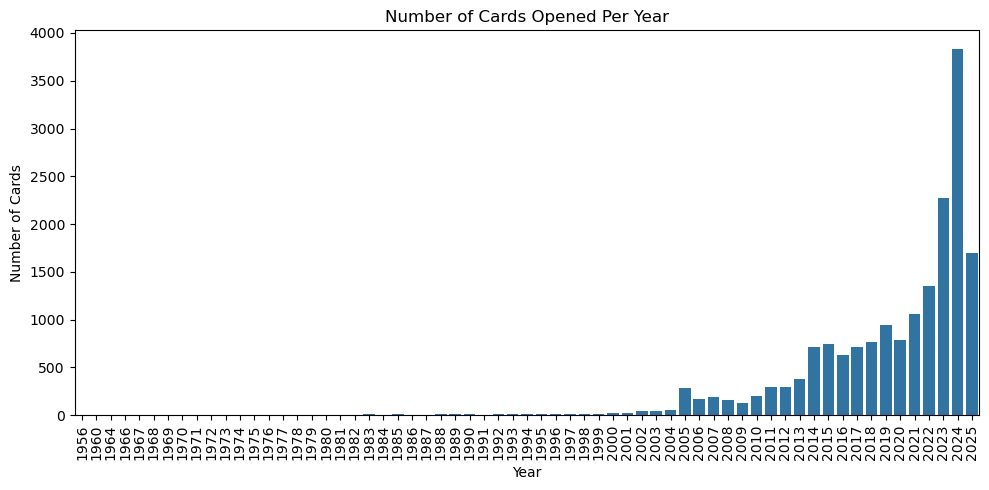

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(data=yearly_openings)
plt.title('Number of Cards Opened Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cards')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Card types: 
 account_card_type
DUAL CARD    9163
PLCC         8907
Name: count, dtype: int64


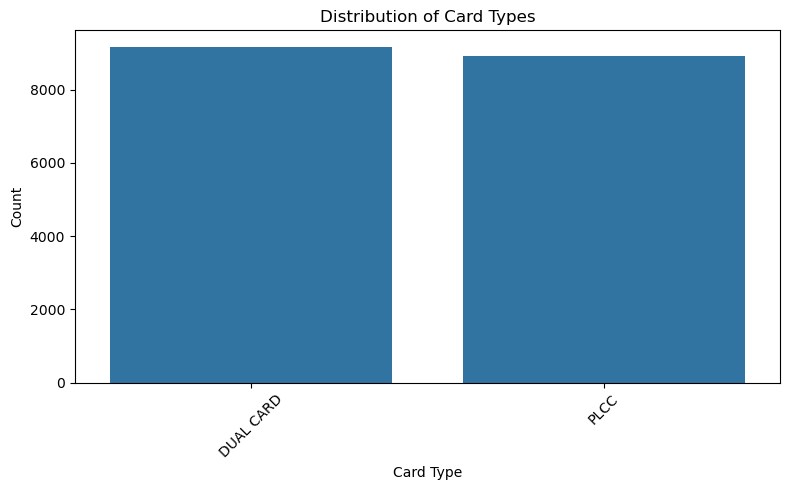

In [11]:
types = account_dim['account_card_type'].value_counts()
print("\nCard types: \n", types)
plt.figure(figsize=(8, 5))
sns.barplot(data=types)
plt.title('Distribution of Card Types')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We note that there is an even distribution (almost 50-50) for PLCC and Dual Cards.

### Statements Data

In [12]:
statements.head()

,current_account_nbr,billing_cycle_date,payment_hist_1_12_mths,return_check_cnt_2yr,return_check_cnt_last_mth,return_check_cnt_py,return_check_cnt_total,return_check_cnt_ytd,prev_balance
0,PKgK5204A2hwjCfA,2019-02-01,QQQQQQQQQQQQ,0,99,0,0,0,5152.54
1,iOOwMzkHGaPVUDVL,2018-09-20,IIIAZZZZZZZZ,0,99,0,0,0,311.71
2,jXzGZNN2VER7OPYX,2023-12-27,QQQQQIIIIQQQ,0,99,0,0,0,1482.13
3,LHeW9saekessmQ64,2024-05-16,IIIIIIA,0,99,0,0,0,1039.10
4,3F9novlPuaHD8tZz,2025-01-13,IIIIIIIIIIII,0,99,0,0,0,1392.79


In [13]:
print(statements.shape)

(658228, 9)


In [14]:
statements.dtypes

current_account_nbr           object
billing_cycle_date            object
payment_hist_1_12_mths        object
return_check_cnt_2yr           int64
return_check_cnt_last_mth      int64
return_check_cnt_py            int64
return_check_cnt_total         int64
return_check_cnt_ytd           int64
prev_balance                 float64
dtype: object

In [15]:
print(statements.describe())

       return_check_cnt_2yr  return_check_cnt_last_mth  return_check_cnt_py  \
count         658228.000000              658228.000000        658228.000000   
mean               0.021157                  96.523765             0.008783   
std                0.163609                  13.462086             0.100000   
min                0.000000                   0.000000             0.000000   
25%                0.000000                  99.000000             0.000000   
50%                0.000000                  99.000000             0.000000   
75%                0.000000                  99.000000             0.000000   
max                9.000000                  99.000000             4.000000   

       return_check_cnt_total  return_check_cnt_ytd   prev_balance  
count           658228.000000         658228.000000  658228.000000  
mean                 0.049680              0.005424    1165.307135  
std                  0.257204              0.077629    2043.525117  
min         

In [16]:
print("Missing values:\n", statements.isnull().sum())

Missing values:
 current_account_nbr          0
billing_cycle_date           0
payment_hist_1_12_mths       0
return_check_cnt_2yr         0
return_check_cnt_last_mth    0
return_check_cnt_py          0
return_check_cnt_total       0
return_check_cnt_ytd         0
prev_balance                 0
dtype: int64


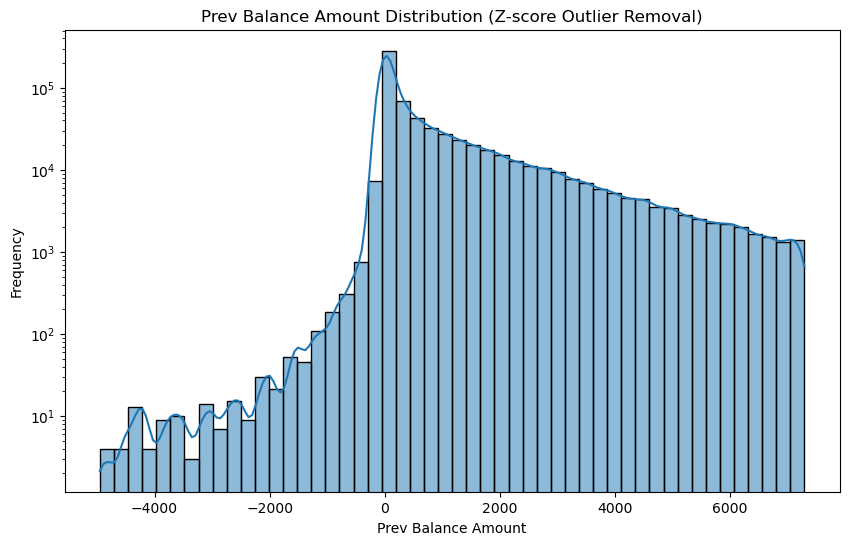

In [17]:
from scipy import stats

z_scores = stats.zscore(statements['prev_balance'].dropna())
filtered_final_data_filtered = statements.loc[(z_scores > -3) & (z_scores < 3)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_final_data_filtered['prev_balance'], bins=50, kde=True)
plt.yscale('log')
plt.title("Prev Balance Amount Distribution (Z-score Outlier Removal)")
plt.xlabel("Prev Balance Amount")
plt.ylabel("Frequency")
plt.show()

#### Visualizing distribution of previous balances for accounts after removing outliers. We use log transform because most customers have low previous balances.

Value counts of total returned checks column: 
 return_check_cnt_total
0     630195
1      24404
2       2839
3        657
4         80
5         34
6          5
7          1
8          4
9          1
10         8
Name: count, dtype: int64


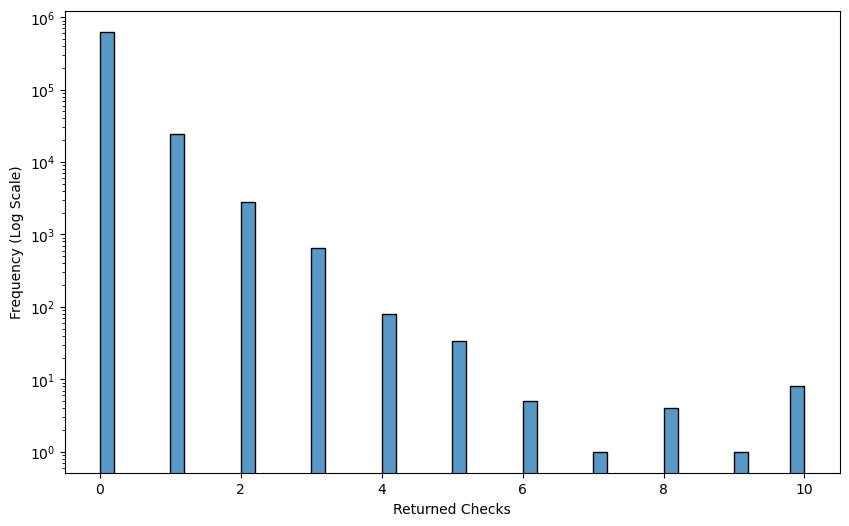

In [18]:
print("Value counts of total returned checks column: \n", statements['return_check_cnt_total'].value_counts().sort_index())
plt.figure(figsize=(10, 6))
sns.histplot(statements['return_check_cnt_total'], bins=50)
plt.yscale('log')
plt.xlabel("Returned Checks")
plt.ylabel("Frequency (Log Scale)")
plt.show()

#### Visualizing distribution of returned checks per account. We use log transform because most customers have 0 returned checks.

### Transactions Data

In [19]:
transactions.head()

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,payment_type,transaction_return_cnt,transaction_sale_cnt,product_amt,product_qty,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,fcr_amount,fcr_flag,fcr_rate_of_exchange,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date
0,X7jfKh6xrPAB8Tx6,SALE,253,2024-06-05,15.78,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,15.78,0.0,2024-06-06
1,yntD77AZDylS48Q4,SALE,253,2024-06-19,14.85,NaN,0,1,NaN,NaN,96971.0,N,NaN,0.0,NaN,NaN,NaN,840,14.85,0.0,2024-06-20
2,LIJPI0sK28Pa7fX2,SALE,253,2024-06-26,136.16,NaN,0,1,NaN,NaN,2786.0,N,NaN,0.0,NaN,NaN,NaN,840,136.16,0.0,2024-06-27
3,CMAr5Apxwdzpvoze,SALE,253,2024-08-15,8.74,NaN,0,1,NaN,NaN,78988.0,N,NaN,0.0,NaN,NaN,NaN,840,8.74,0.0,2024-08-16
4,eJSfTCGPvJulGzd3,SALE,253,2024-08-17,26.65,NaN,0,1,NaN,NaN,87227.0,N,NaN,0.0,NaN,NaN,NaN,840,26.65,0.0,2024-08-18


In [20]:
print(transactions.dtypes)

current_account_nbr        object
transaction_type           object
transaction_code            int64
transaction_date           object
transaction_amt           float64
payment_type              float64
transaction_return_cnt      int64
transaction_sale_cnt        int64
product_amt               float64
product_qty               float64
invoice_nbr               float64
first_purchase_ind         object
adj_orgn_tran_dt           object
curr_markup_fee           float64
fcr_amount                float64
fcr_flag                  float64
fcr_rate_of_exchange      float64
frgn_curr_code             object
frgn_tran_amt             float64
us_equiv_amt              float64
posting_date               object
dtype: object


In [21]:
print("Missing values:\n", transactions.isnull().sum())

Missing values:
 current_account_nbr            0
transaction_type               0
transaction_code               0
transaction_date               0
transaction_amt                0
payment_type              493336
transaction_return_cnt         0
transaction_sale_cnt           0
product_amt               493336
product_qty               493336
invoice_nbr               175050
first_purchase_ind             0
adj_orgn_tran_dt          465615
curr_markup_fee               12
fcr_amount                493336
fcr_flag                  493336
fcr_rate_of_exchange      493336
frgn_curr_code                12
frgn_tran_amt                 12
us_equiv_amt                  12
posting_date                   0
dtype: int64


In [22]:
print(transactions.shape)

(493336, 21)


In [23]:
print(transactions.nunique())

current_account_nbr       14099
transaction_type              4
transaction_code             18
transaction_date            395
transaction_amt           67786
payment_type                  0
transaction_return_cnt        2
transaction_sale_cnt          2
product_amt                   0
product_qty                   0
invoice_nbr               95711
first_purchase_ind            2
adj_orgn_tran_dt            567
curr_markup_fee               1
fcr_amount                    0
fcr_flag                      0
fcr_rate_of_exchange          0
frgn_curr_code                2
frgn_tran_amt             60956
us_equiv_amt                  1
posting_date                312
dtype: int64


In [24]:
print(transactions.describe())

       transaction_code  transaction_amt  payment_type  \
count     493336.000000    493336.000000           0.0   
mean         257.807527       274.131582           NaN   
std            9.121606       910.950640           NaN   
min          251.000000     -5400.000000           NaN   
25%          253.000000        20.770000           NaN   
50%          253.000000        47.810000           NaN   
75%          259.000000       127.950000           NaN   
max          400.000000     45000.000000           NaN   

       transaction_return_cnt  transaction_sale_cnt  product_amt  product_qty  \
count           493336.000000         493336.000000          0.0          0.0   
mean                 0.038495              0.684975          NaN          NaN   
std                  0.192388              0.464526          NaN          NaN   
min                  0.000000              0.000000          NaN          NaN   
25%                  0.000000              0.000000          NaN        

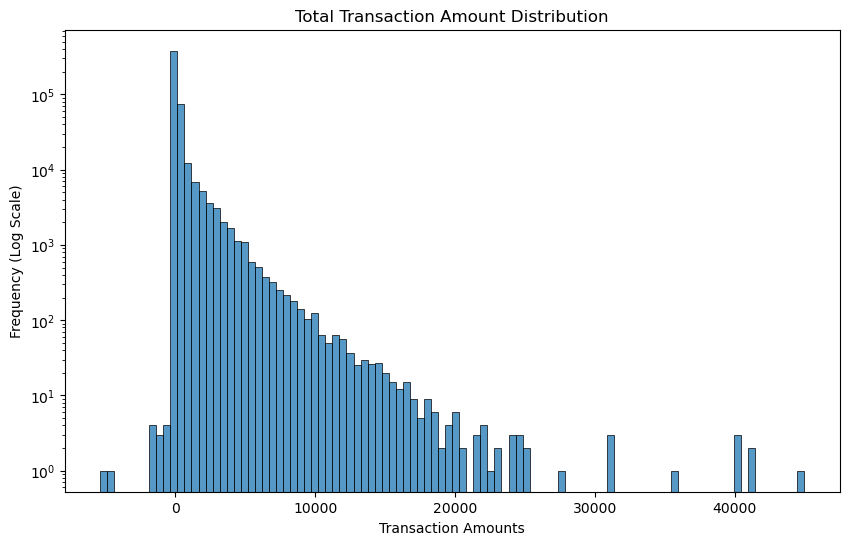

In [25]:
plt.figure(figsize=(10, 6))
plt.title("Total Transaction Amount Distribution")
sns.histplot(transactions['transaction_amt'], bins=100)
plt.yscale('log')
plt.xlabel("Transaction Amounts")
plt.ylabel("Frequency (Log Scale)")
plt.show()


#### Visualizing distribution of total transaction values across ALL transaction types for all customers for all years.

### World Store Transactions Data

In [26]:
world_trans.head()

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,payment_type,transaction_return_cnt,transaction_sale_cnt,product_amt,product_qty,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,fcr_amount,fcr_flag,fcr_rate_of_exchange,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date
0,8DPC9336FwGf8TPz,SALE,253,2024-04-29,47.40,NaN,0,1,NaN,NaN,11039.0,N,2024-03-17,0.0,NaN,NaN,NaN,840,47.40,0.0,2024-04-30
1,DRTiAtZURdSfMAB0,SALE,253,2024-06-25,87.13,NaN,0,1,NaN,NaN,83109.0,N,NaN,0.0,NaN,NaN,NaN,840,87.13,0.0,2024-06-27
2,4y1CqjRDtP3w8Nb5,SALE,253,2024-08-06,30.00,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,30.00,0.0,2024-08-07
3,3dPDITyRPlzdq3wf,SALE,253,2024-09-05,32.30,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,32.30,0.0,2024-09-05
4,q1mnsZTeAaQH71AF,SALE,253,2024-12-30,4.40,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,4.40,0.0,2024-12-31


In [27]:
print("Missing values:\n", world_trans.isnull().sum())
print("\nDatatypes:", world_trans.dtypes)

Missing values:
 current_account_nbr             0
transaction_type                0
transaction_code                0
transaction_date                0
transaction_amt                 0
payment_type              1053854
transaction_return_cnt          0
transaction_sale_cnt            0
product_amt               1053854
product_qty               1053854
invoice_nbr                887004
first_purchase_ind              0
adj_orgn_tran_dt          1009290
curr_markup_fee                85
fcr_amount                1053854
fcr_flag                  1053854
fcr_rate_of_exchange      1053854
frgn_curr_code                 85
frgn_tran_amt                  85
us_equiv_amt                   85
posting_date                    0
dtype: int64

Datatypes: current_account_nbr        object
transaction_type           object
transaction_code            int64
transaction_date           object
transaction_amt           float64
payment_type              float64
transaction_return_cnt      int64
transa

In [28]:
print(world_trans.nunique())

current_account_nbr        6164
transaction_type              4
transaction_code             16
transaction_date            392
transaction_amt           48489
payment_type                  0
transaction_return_cnt        2
transaction_sale_cnt          2
product_amt                   0
product_qty                   0
invoice_nbr               74087
first_purchase_ind            2
adj_orgn_tran_dt            610
curr_markup_fee               1
fcr_amount                    0
fcr_flag                      0
fcr_rate_of_exchange          0
frgn_curr_code               64
frgn_tran_amt             48202
us_equiv_amt                  1
posting_date                312
dtype: int64


In [29]:
print(world_trans.describe())

       transaction_code  transaction_amt  payment_type  \
count      1.053854e+06     1.053854e+06           0.0   
mean       2.532944e+02     6.908752e+01           NaN   
std        5.379737e+00     2.607862e+02           NaN   
min        2.510000e+02    -6.260340e+03           NaN   
25%        2.530000e+02     1.230000e+01           NaN   
50%        2.530000e+02     2.723000e+01           NaN   
75%        2.530000e+02     5.637000e+01           NaN   
max        7.010000e+02     2.448340e+04           NaN   

       transaction_return_cnt  transaction_sale_cnt  product_amt  product_qty  \
count            1.053854e+06          1.053854e+06          0.0          0.0   
mean             1.978073e-02          9.698972e-01          NaN          NaN   
std              1.392461e-01          1.708704e-01          NaN          NaN   
min              0.000000e+00          0.000000e+00          NaN          NaN   
25%              0.000000e+00          1.000000e+00          NaN        

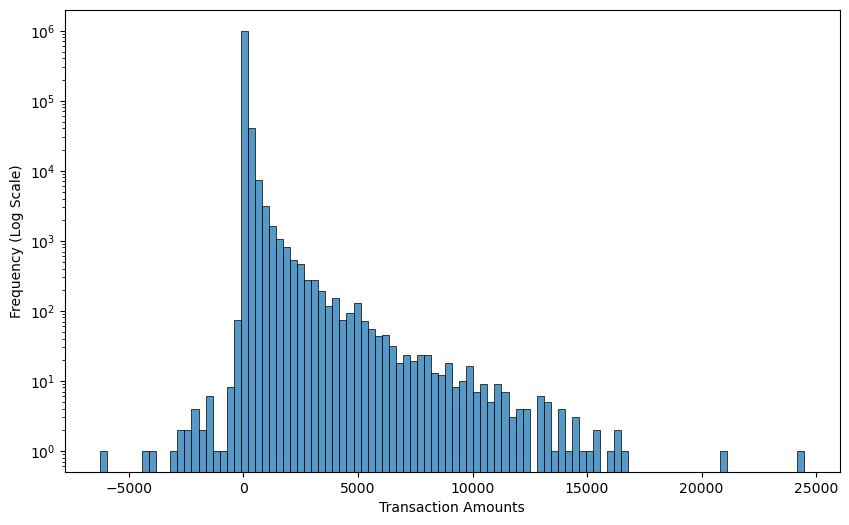

In [30]:

plt.figure(figsize=(10, 6))
sns.histplot(world_trans['transaction_amt'], bins=100)
plt.yscale('log') 
plt.xlabel("Transaction Amounts")
plt.ylabel("Frequency (Log Scale)")
plt.show()


#### Visualizing distribution of total world store transaction values across ALL transaction types for all customers for all years.

### Combined Sales Data

In [31]:
sales_final_data_filtered = pd.concat([transactions, world_trans], ignore_index=True)
sales_final_data_filtered.head()

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,payment_type,transaction_return_cnt,transaction_sale_cnt,product_amt,product_qty,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,fcr_amount,fcr_flag,fcr_rate_of_exchange,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date
0,X7jfKh6xrPAB8Tx6,SALE,253,2024-06-05,15.78,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,15.78,0.0,2024-06-06
1,yntD77AZDylS48Q4,SALE,253,2024-06-19,14.85,NaN,0,1,NaN,NaN,96971.0,N,NaN,0.0,NaN,NaN,NaN,840,14.85,0.0,2024-06-20
2,LIJPI0sK28Pa7fX2,SALE,253,2024-06-26,136.16,NaN,0,1,NaN,NaN,2786.0,N,NaN,0.0,NaN,NaN,NaN,840,136.16,0.0,2024-06-27
3,CMAr5Apxwdzpvoze,SALE,253,2024-08-15,8.74,NaN,0,1,NaN,NaN,78988.0,N,NaN,0.0,NaN,NaN,NaN,840,8.74,0.0,2024-08-16
4,eJSfTCGPvJulGzd3,SALE,253,2024-08-17,26.65,NaN,0,1,NaN,NaN,87227.0,N,NaN,0.0,NaN,NaN,NaN,840,26.65,0.0,2024-08-18


In [32]:
sales_final_data_filtered = sales_final_data_filtered[sales_final_data_filtered['transaction_type'] == 'SALE']

In [33]:
sales_final_data_filtered['transaction_date'] = pd.to_datetime(sales_final_data_filtered['transaction_date'], errors='coerce')
sales_final_data_filtered['year'] = sales_final_data_filtered['transaction_date'].dt.year
sales_final_data_filtered['month'] = sales_final_data_filtered['transaction_date'].dt.month
sales_final_data_filtered = sales_final_data_filtered.sort_values(by=['year', 'month'])
sales_final_data_filtered.head()

,current_account_nbr,transaction_type,transaction_code,transaction_date,transaction_amt,payment_type,transaction_return_cnt,transaction_sale_cnt,product_amt,product_qty,invoice_nbr,first_purchase_ind,adj_orgn_tran_dt,curr_markup_fee,fcr_amount,fcr_flag,fcr_rate_of_exchange,frgn_curr_code,frgn_tran_amt,us_equiv_amt,posting_date,year,month
777325,J7E2HrNlhz64ViWF,SALE,253,2023-02-17,180.58,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,0.0,0.0,2024-04-24,2023,2
793218,J7E2HrNlhz64ViWF,SALE,253,2023-02-17,12.25,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,0.0,0.0,2024-04-24,2023,2
1056823,Fezn36ExtQgN4sjW,SALE,253,2023-11-12,14.30,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,14.3,0.0,2024-04-25,2023,11
1191868,gYwuYz3DDnEz16vo,SALE,256,2024-01-27,-113.37,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,0.0,0.0,2024-04-07,2024,1
1272581,F1eowDdERobTTUxt,SALE,256,2024-01-05,-242.74,NaN,0,1,NaN,NaN,NaN,N,NaN,0.0,NaN,NaN,NaN,840,0.0,0.0,2024-05-15,2024,1


In [34]:
print(sales_final_data_filtered.describe())

       transaction_code               transaction_date  transaction_amt  \
count      1.360053e+06                        1360053     1.360053e+06   
mean       2.530025e+02  2024-09-29 07:17:28.821773824     7.259478e+01   
min        2.530000e+02            2023-02-17 00:00:00    -5.400000e+03   
25%        2.530000e+02            2024-07-02 00:00:00     1.294000e+01   
50%        2.530000e+02            2024-10-04 00:00:00     2.919000e+01   
75%        2.530000e+02            2024-12-26 00:00:00     6.100000e+01   
max        2.560000e+02            2025-03-24 00:00:00     4.500000e+04   
std        8.639928e-02                            NaN     2.773771e+02   

       payment_type  transaction_return_cnt  transaction_sale_cnt  \
count           0.0               1360053.0             1360053.0   
mean            NaN                     0.0                   1.0   
min             NaN                     0.0                   1.0   
25%             NaN                     0.0     

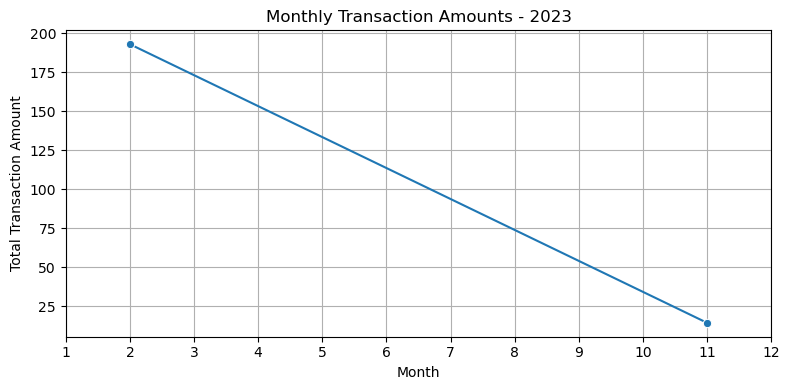

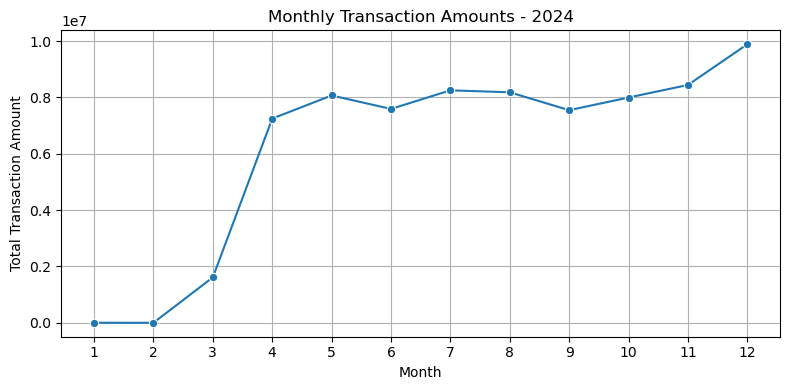

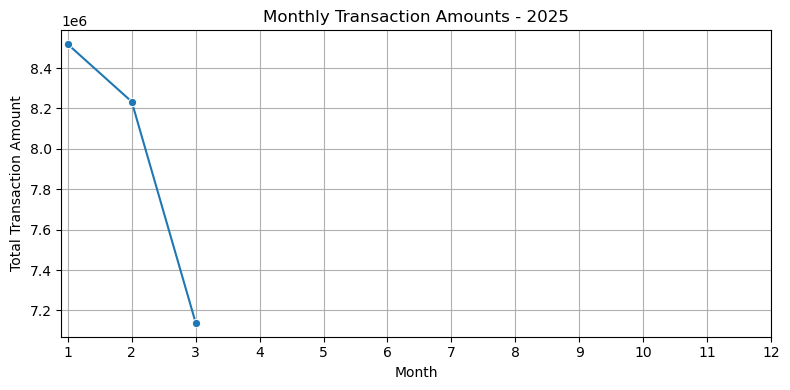

In [35]:
monthly_summary = sales_final_data_filtered.groupby(['year', 'month'])['transaction_amt'].sum().reset_index()

each_year = monthly_summary['year'].unique()

for year in sorted(each_year):
    plt.figure(figsize=(8, 4))
    sns.lineplot(
        data=monthly_summary[monthly_summary['year'] == year],
        x='month', y='transaction_amt', marker='o'
    )
    plt.title(f'Monthly Transaction Amounts - {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Transaction Amount')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### We visualize only the transactions that are considered as "Sales". We do not have sufficient data for 2023 and 2025 to observe trends. However, in 2024, we can observe a clear spike during the summer months, and then the highest spike in the holiday months of November and December, indicating customers spend more during those months.

### Account Level Features Data

In [36]:
rams_batch.head()

,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,cu_cur_balance,cu_cur_nbr_due,ca_current_utilz,cu_account_nbr,cu_line_incr_excl_flag,ca_max_dlq_lst_6_mnths,ca_mnths_since_active,ca_mnths_since_cl_chng,ca_mob,ca_nsf_count_lst_12_months,cu_otb,cu_rnd_nbr,rb_new_bhv_scr,rb_crd_gr_new_crd_gr,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
0,779,0,0,0,2,2,5000,782,25000,0,1017.56,0,4,37eHiwRArQ0A7jhs,N,0,0,45,163,0,24002.44,11,776,R,2024-12-17,997.56,521.07,647.86,1045.03,858.49,334.54,2
1,735,0,999,0,1,2,0,836,1500,0,20.00,0,0,UV2Z1ODsmodPM2eO,N,0,1,15,16,0,1500.00,87,735,R,2025-02-21,0.00,37.65,60.25,175.67,54.08,0.00,0
2,745,0,0,0,1,2,8000,832,40000,0,1037.55,0,3,VqweW0TxF93M2EF5,N,0,0,7,8,0,38982.45,54,748,R,2024-10-10,1024.55,578.80,665.81,816.43,2526.27,3129.23,1
3,13,0,0,0,1,0,60,684,300,0,20.00,0,0,pfKs8HDpmFV3b1zL,N,0,12,15,16,0,300.00,47,13,O,2025-01-27,0.00,0.00,0.00,0.00,0.00,0.00,0
4,6,0,999,0,1,7,0,681,5200,0,851.73,0,16,35VRb2UTGapQk6wE,N,0,0,1,2,0,4368.27,87,6,P,2025-03-19,895.33,0.00,0.00,0.00,0.00,0.00,7


In [37]:
rams_batch.dtypes

cu_bhv_scr                      int64
ca_cash_bal_pct_crd_line        int64
ca_cash_bal_pct_cash_line       int64
cu_nbr_days_dlq                 int64
cu_nbr_of_plastics              int64
ca_avg_utilz_lst_6_mnths        int64
cu_cash_line_am                 int64
cu_crd_bureau_scr               int64
cu_crd_line                     int64
cu_next_crd_line_rev_date       int64
cu_cur_balance                float64
cu_cur_nbr_due                  int64
ca_current_utilz                int64
cu_account_nbr                 object
cu_line_incr_excl_flag         object
ca_max_dlq_lst_6_mnths          int64
ca_mnths_since_active           int64
ca_mnths_since_cl_chng          int64
ca_mob                          int64
ca_nsf_count_lst_12_months      int64
cu_otb                        float64
cu_rnd_nbr                      int64
rb_new_bhv_scr                  int64
rb_crd_gr_new_crd_gr           object
cu_processing_date             object
mo_tot_sales_array_1          float64
mo_tot_sales

In [38]:
rams_batch.isnull().sum()

cu_bhv_scr                    0
ca_cash_bal_pct_crd_line      0
ca_cash_bal_pct_cash_line     0
cu_nbr_days_dlq               0
cu_nbr_of_plastics            0
ca_avg_utilz_lst_6_mnths      0
cu_cash_line_am               0
cu_crd_bureau_scr             0
cu_crd_line                   0
cu_next_crd_line_rev_date     0
cu_cur_balance                0
cu_cur_nbr_due                0
ca_current_utilz              0
cu_account_nbr                0
cu_line_incr_excl_flag        0
ca_max_dlq_lst_6_mnths        0
ca_mnths_since_active         0
ca_mnths_since_cl_chng        0
ca_mob                        0
ca_nsf_count_lst_12_months    0
cu_otb                        0
cu_rnd_nbr                    0
rb_new_bhv_scr                0
rb_crd_gr_new_crd_gr          0
cu_processing_date            0
mo_tot_sales_array_1          0
mo_tot_sales_array_2          0
mo_tot_sales_array_3          0
mo_tot_sales_array_4          0
mo_tot_sales_array_5          0
mo_tot_sales_array_6          0
ca_avg_u

In [39]:
rams_batch.describe()

,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,cu_cur_balance,cu_cur_nbr_due,ca_current_utilz,ca_max_dlq_lst_6_mnths,ca_mnths_since_active,ca_mnths_since_cl_chng,ca_mob,ca_nsf_count_lst_12_months,cu_otb,cu_rnd_nbr,rb_new_bhv_scr,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths
count,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,9.679900e+04,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.000000,96799.00000
mean,483.397421,1.347762,194.651970,0.800835,1.109980,17.554593,3.438776e+14,738.759522,6539.962345,379.908553,1151.806632,0.026694,18.000506,0.087015,0.652889,27.284022,70.300706,0.011901,5408.155713,49.070714,490.013750,544.560049,551.911860,562.588240,561.657413,558.643970,568.096281,17.86378
std,332.111560,35.072836,395.472653,5.353975,0.500409,45.337251,4.750032e+14,119.551768,6097.958196,1657.370609,2211.754001,0.178466,46.728227,0.307588,21.675926,26.884598,78.804115,0.121216,5543.608761,28.689501,329.119252,1500.706255,1517.119268,1541.275051,1540.598553,1530.451883,1544.743771,47.36686
min,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000e+00,0.000000,0.000000,0.000000,-12506.230000,0.000000,-999.000000,0.000000,-99.000000,0.000000,1.000000,0.000000,-3322.320000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.00000
25%,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.200000e+02,694.000000,1800.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,1100.000000,24.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,687.000000,0.000000,0.000000,0.000000,1.000000,5.000000,2.580000e+03,774.000000,4500.000000,0.000000,133.900000,0.000000,3.000000,0.000000,0.000000,17.000000,43.000000,0.000000,3500.000000,49.000000,688.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
75%,735.000000,0.000000,0.000000,0.000000,1.000000,26.000000,1.000000e+15,810.000000,9900.000000,0.000000,1394.450000,0.000000,26.000000,0.000000,4.000000,40.000000,106.000000,0.000000,8000.000000,74.000000,736.000000,227.380000,227.930000,230.000000,222.540000,218.260000,221.640000,26.00000
max,780.000000,999.000000,999.000000,150.000000,6.000000,188.000000,1.000000e+15,850.000000,50000.000000,9999.000000,40249.000000,5.000000,191.000000,5.000000,63.000000,99.000000,831.000000,7.000000,41326.000000,99.000000,780.000000,40200.000000,40200.000000,40200.000000,41222.000000,41222.000000,41222.000000,730.00000


In [40]:
rams_batch.nunique()

cu_bhv_scr                      242
ca_cash_bal_pct_crd_line         69
ca_cash_bal_pct_cash_line        98
cu_nbr_days_dlq                   5
cu_nbr_of_plastics                7
ca_avg_utilz_lst_6_mnths        177
cu_cash_line_am                 541
cu_crd_bureau_scr               390
cu_crd_line                     735
cu_next_crd_line_rev_date        16
cu_cur_balance                48630
cu_cur_nbr_due                    5
ca_current_utilz                195
cu_account_nbr                17569
cu_line_incr_excl_flag            2
ca_max_dlq_lst_6_mnths            5
ca_mnths_since_active            63
ca_mnths_since_cl_chng          100
ca_mob                          680
ca_nsf_count_lst_12_months        7
cu_otb                        51794
cu_rnd_nbr                      100
rb_new_bhv_scr                  246
rb_crd_gr_new_crd_gr             16
cu_processing_date              151
mo_tot_sales_array_1          30824
mo_tot_sales_array_2          30844
mo_tot_sales_array_3        

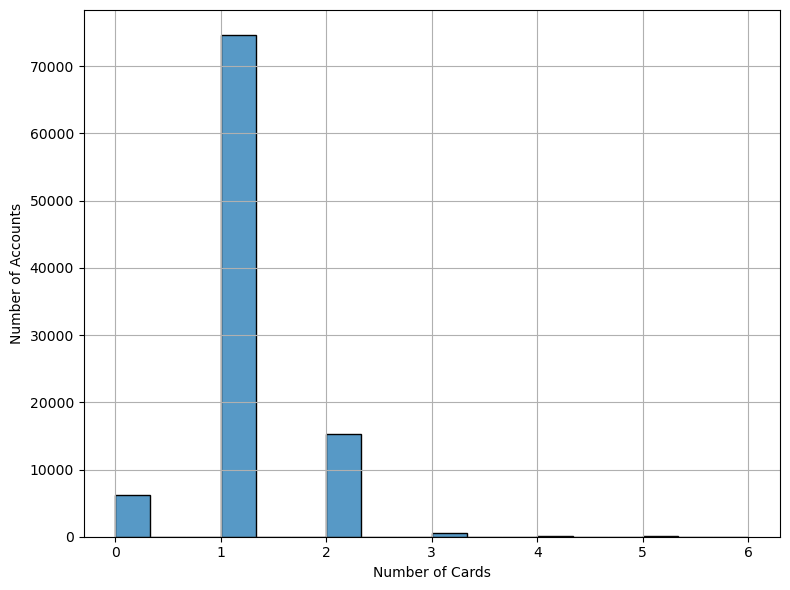

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(rams_batch['cu_nbr_of_plastics'])
# plt.title('Distribution of Previous Account Balances')
plt.xlabel('Number of Cards')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Most customers have at least 1 physical card, with some having no physical cards (~7000). Very few customers have more than 2 physical cards.

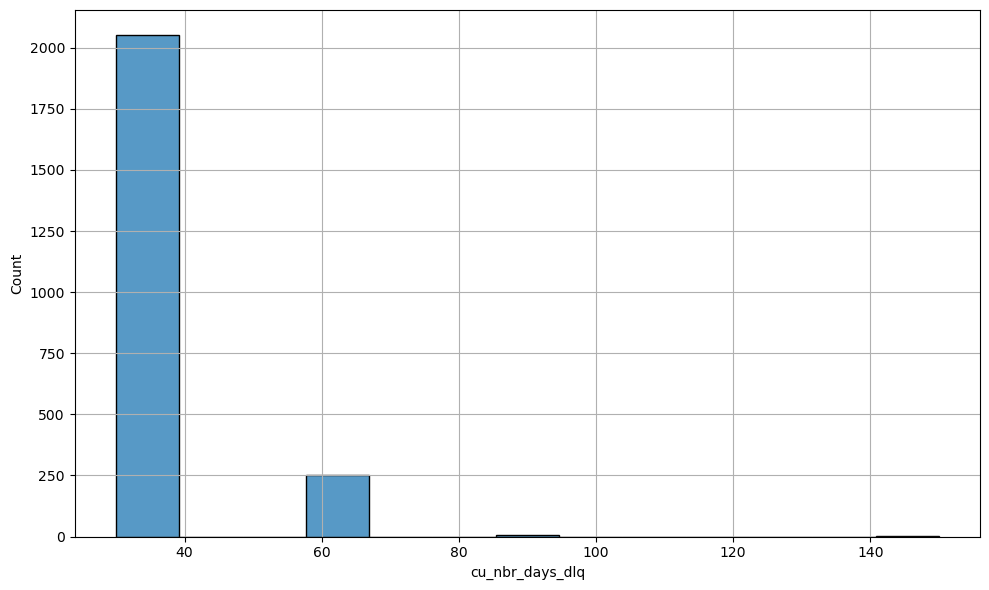

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(rams_batch[rams_batch['cu_nbr_days_dlq'] != 0]['cu_nbr_days_dlq'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
print(rams_batch['cu_nbr_days_dlq'].value_counts())
print(rams_batch['ca_max_dlq_lst_6_mnths'].value_counts())

cu_nbr_days_dlq
0      94486
30      2052
60       253
90         7
150        1
Name: count, dtype: int64
ca_max_dlq_lst_6_mnths
0    89088
1     7018
2      676
3       16
5        1
Name: count, dtype: int64


#### Based on the above outputs, we can see that majority of customers have no delinquency history. In our graph, we do not include the customers that have no delinquency history. We can see that there are 2000+ records of delinquency in our data.

In [44]:
rams_batch['cu_processing_date'] = pd.to_datetime(rams_batch['cu_processing_date'], errors='coerce')
rams_batch['year'] = rams_batch['cu_processing_date'].dt.year
rams_batch['month'] = rams_batch['cu_processing_date'].dt.month
rams_batch = rams_batch.sort_values(by=['year', 'month'])
rams_batch.head()
rams_batch.rename(columns={'cu_account_nbr': 'current_account_nbr'}, inplace=True)
rams_batch['cu_processing_date'] = pd.to_datetime(rams_batch['cu_processing_date'], errors='coerce')
final_data_filtered_sorted = rams_batch.sort_values(by='cu_processing_date', ascending=False)
latest_scores = final_data_filtered_sorted.drop_duplicates(subset='current_account_nbr', keep='first')

In [45]:
print(len(latest_scores))

17569


In [46]:
account_summary = sales_final_data_filtered.groupby('current_account_nbr')['transaction_amt'].sum().reset_index()

account_summary = sales_final_data_filtered.groupby('current_account_nbr').agg(
    total_transaction_amt=('transaction_amt', 'sum'),
    transaction_count=('transaction_amt', 'count')
).reset_index()

account_summary.columns = ['current_account_nbr', 'total_transaction_amt', 'transaction_count']
print(account_summary.head())
print(len(account_summary))

  current_account_nbr  total_transaction_amt  transaction_count
0    00gwujJkd597VxLd                  25.90                  1
1    00iP5U82D8XwVQ9G                4867.19                666
2    00oyr3QppAzjLws4                 855.60                 11
3    02WRVV8yusgcZWLW                7327.74                 69
4    033o9yHYen3xoz6k               23736.65                504
12930


In [47]:
acctsales = pd.merge(account_summary, latest_scores, on='current_account_nbr', how='inner')
acctsales.head()

,current_account_nbr,total_transaction_amt,transaction_count,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,cu_cur_balance,cu_cur_nbr_due,ca_current_utilz,cu_line_incr_excl_flag,ca_max_dlq_lst_6_mnths,ca_mnths_since_active,ca_mnths_since_cl_chng,ca_mob,ca_nsf_count_lst_12_months,cu_otb,cu_rnd_nbr,rb_new_bhv_scr,rb_crd_gr_new_crd_gr,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths,year,month
0,00iP5U82D8XwVQ9G,4867.19,666,735,0,999,0,1,14,0,793,3500,0,354.10,0,10,N,0,0,30,67,0,3165.90,11,742,R,2025-02-23,334.10,494.19,681.86,638.37,530.32,441.16,14,2025,2
1,00oyr3QppAzjLws4,855.60,11,661,0,999,0,1,90,0,662,2900,0,2552.42,0,87,N,0,0,41,98,0,367.58,6,679,O,2025-03-10,0.00,30.03,26.74,188.05,0.00,0.00,90,2025,3
2,02WRVV8yusgcZWLW,7327.74,69,751,0,0,0,1,26,3000,836,15000,0,5808.49,0,39,N,0,0,48,127,0,9211.51,92,725,R,2025-03-13,5810.47,1815.95,2272.59,16769.39,3525.48,3131.41,21,2025,3
3,033o9yHYen3xoz6k,23736.65,504,747,0,0,0,1,15,3000,811,15000,1124,2420.12,0,16,N,0,0,97,103,0,12599.88,83,744,R,2025-03-10,2432.72,1642.67,3203.02,2200.97,2709.47,2086.60,14,2025,3
4,034bM166vNmgLiIA,2494.91,56,698,0,0,0,1,69,220,667,1100,0,789.19,0,70,N,0,0,12,13,0,330.81,81,692,P,2025-03-10,30.00,126.24,30.00,119.27,570.12,488.01,71,2025,3


In [48]:
acctsales.describe()

,total_transaction_amt,transaction_count,cu_bhv_scr,ca_cash_bal_pct_crd_line,ca_cash_bal_pct_cash_line,cu_nbr_days_dlq,cu_nbr_of_plastics,ca_avg_utilz_lst_6_mnths,cu_cash_line_am,cu_crd_bureau_scr,cu_crd_line,cu_next_crd_line_rev_date,cu_cur_balance,cu_cur_nbr_due,ca_current_utilz,ca_max_dlq_lst_6_mnths,ca_mnths_since_active,ca_mnths_since_cl_chng,ca_mob,ca_nsf_count_lst_12_months,cu_otb,cu_rnd_nbr,rb_new_bhv_scr,cu_processing_date,mo_tot_sales_array_1,mo_tot_sales_array_2,mo_tot_sales_array_3,mo_tot_sales_array_4,mo_tot_sales_array_5,mo_tot_sales_array_6,ca_avg_utilz_lst_3_mnths,year,month
count,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,1.269400e+04,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.000000,12694.0,12694.000000
mean,7749.665982,107.089412,583.522136,0.133685,187.539074,1.297463,1.135970,23.808335,2.834411e+14,743.415236,7411.877029,223.699307,1432.166236,0.043249,24.213329,0.116275,0.701985,26.543879,70.396880,0.017331,5999.710793,49.198519,602.657791,2025-03-09 07:45:40.129194752,704.484500,667.843389,780.777409,794.037936,698.005229,707.822207,24.089412,2025.0,2.755475
min,-4433.920000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.000000,0.000000e+00,0.000000,100.000000,0.000000,-2915.410000,0.000000,-137.000000,0.000000,-99.000000,0.000000,1.000000,0.000000,-2117.530000,0.000000,3.000000,2025-02-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,2025.0,2.000000
25%,359.392500,2.000000,655.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.600000e+02,688.000000,2300.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,6.000000,11.000000,0.000000,1200.000000,24.000000,661.000000,2025-03-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2025.0,3.000000
50%,1479.055000,10.000000,709.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2.420000e+03,774.000000,5100.000000,0.000000,465.480000,0.000000,8.000000,0.000000,0.000000,15.000000,43.000000,0.000000,3953.705000,49.000000,710.000000,2025-03-11 00:00:00,5.030000,0.000000,18.695000,9.960000,0.000000,0.000000,10.000000,2025.0,3.000000
75%,5988.225000,73.000000,744.000000,0.000000,0.000000,0.000000,1.000000,36.000000,1.000000e+15,810.000000,12000.000000,0.000000,1851.347500,0.000000,38.000000,0.000000,1.000000,40.000000,113.000000,0.000000,9700.000000,74.000000,745.000000,2025-03-17 00:00:00,565.282500,533.417500,623.785000,626.097500,518.722500,525.080000,36.000000,2025.0,3.000000
max,343159.600000,2398.000000,780.000000,81.000000,999.000000,90.000000,6.000000,130.000000,1.000000e+15,850.000000,50000.000000,9999.000000,35779.000000,3.000000,155.000000,3.000000,28.000000,99.000000,772.000000,5.000000,41326.000000,99.000000,780.000000,2025-03-24 00:00:00,32845.340000,24078.060000,40200.000000,38804.580000,33741.330000,33906.390000,360.000000,2025.0,3.000000
std,15741.576412,220.811508,278.187459,2.240699,389.840691,7.249755,0.507822,29.699152,4.506863e+14,93.696038,6479.706328,1031.157597,2427.141213,0.241659,32.324421,0.363632,5.940019,27.504357,77.551665,0.141512,5990.424598,28.780705,260.408771,NaN,1641.404253,1567.528096,1781.991812,1835.841166,1669.096997,1657.108134,32.719564,0.0,0.429822


/var/folders/fx/rh916w1s3c3dkt_zwv8vhvp80000gn/T/ipykernel_26248/3987340252.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_summary = acctsales.groupby('bhv_scr_bin')['total_transaction_amt'].sum().reset_index()


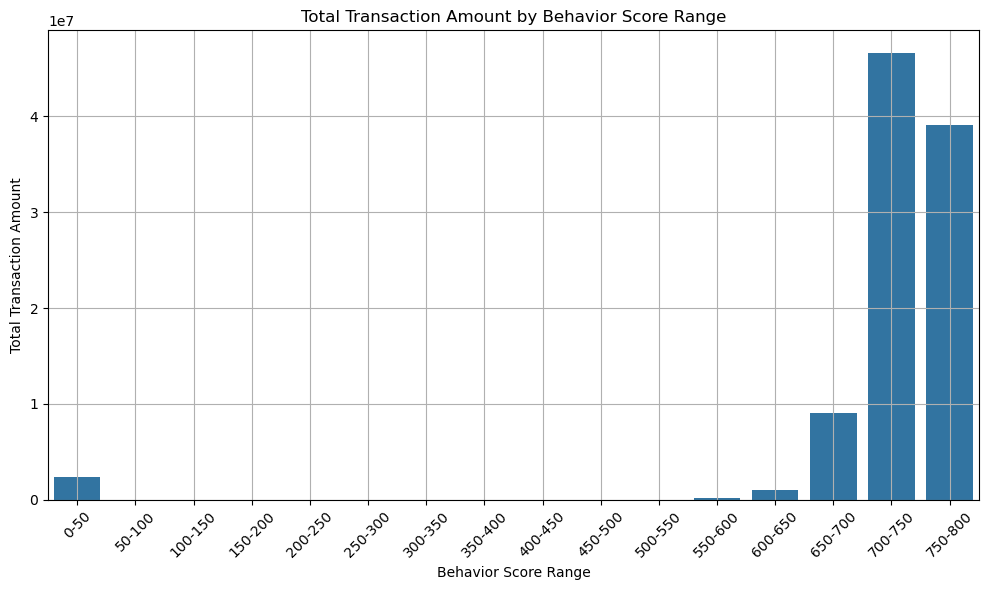

In [49]:

bins = list(range(0, 850, 50))
labels = [f'{i}-{i+50}' for i in bins[:-1]]

acctsales['bhv_scr_bin'] = pd.cut(acctsales['rb_new_bhv_scr'], bins=bins, labels=labels, right=False)

score_summary = acctsales.groupby('bhv_scr_bin')['total_transaction_amt'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=score_summary, x='bhv_scr_bin', y='total_transaction_amt')
plt.title('Total Transaction Amount by Behavior Score Range')
plt.xlabel('Behavior Score Range')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


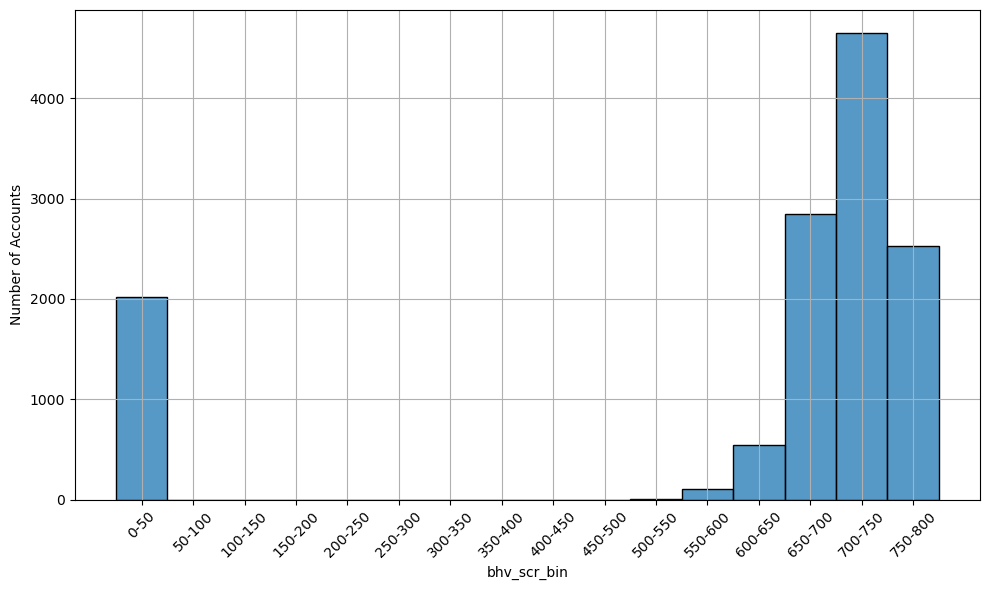

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=acctsales,
    x='bhv_scr_bin',
    bins=100,
    kde=False
)
# plt.title('Distribution of 6M Utilization (Positive Only)')
# plt.xlabel('Average Utilization (Last 6 Months)')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
acctsales['bhv_scr_bin'].value_counts()

bhv_scr_bin
700-750    4649
650-700    2850
750-800    2526
0-50       2017
600-650     545
550-600     103
500-550       4
50-100        0
100-150       0
150-200       0
200-250       0
250-300       0
300-350       0
350-400       0
400-450       0
450-500       0
Name: count, dtype: int64

#### We merged the account level features data with the transactions data, then put the accounts into bins of their internal behavior scores (based on the latest score for each account). Then we visualized the spend distribution of the accounts in each bin, as well as the number of accounts in each bin. The highest number of accounts are in the 700-750 bin (which is the second best bin for the scores).

### Preprocessing and Feature Engineering

In [53]:
os.makedirs('processed_data', exist_ok=True)

def load_and_merge_account_data(account_dim, rams_batch, fraud_cases, fraud_trans):

    # account_dim = pd.read_csv('data/account_dim_20250325.csv')
    # # syf_id = pd.read_csv('data/syf_id_20250325.csv')
    # rams_batch = pd.read_csv('data/rams_batch_cur_20250325.csv')
    # fraud_cases = pd.read_csv('data/fraud_claim_case_20250325.csv')
    # fraud_trans = pd.read_csv('data/fraud_claim_tran_20250325.csv')

    # standardize the name
    account_dim = account_dim.rename(columns={'current_account_nbr': 'account_number'})
    # syf_id = syf_id.rename(columns={'account_nbr_pty': 'account_number'})
    rams_batch = rams_batch.rename(columns={'current_account_nbr': 'account_number'})
    # this was renamed initially from cu_account_nbr to current_account_nbr
    fraud_cases = fraud_cases.rename(columns={'current_account_nbr': 'account_number'})
    fraud_trans = fraud_trans.rename(columns={'current_account_nbr': 'account_number'})

    # Merge account data
    # accounts = pd.merge(account_dim, syf_id, on='account_number', how='left')
    accounts = pd.merge(account_dim, rams_batch, on='account_number', how='left')

    # Add fraud flags
    fraud_accounts = fraud_cases['account_number'].unique()
    accounts['has_fraud_history'] = accounts['account_number'].isin(fraud_accounts).astype(int)

    accounts.to_csv('processed_data/merged_accounts.csv', index=False)

    return accounts

def process_transaction_data(transactions, world_trans):

    transactions = transactions.rename(columns={'current_account_nbr': 'account_number'})
    world_trans = world_trans.rename(columns={'current_account_nbr': 'account_number'})

    all_transactions = pd.concat([transactions, world_trans], axis=0)

    all_transactions['transaction_date'] = pd.to_datetime(all_transactions['transaction_date'])
    all_transactions['posting_date'] = pd.to_datetime(all_transactions['posting_date'])

    all_transactions['year_month'] = all_transactions['transaction_date'].dt.to_period('M')

    all_transactions['is_sale'] = (all_transactions['transaction_type'] == 'SALE').astype(int)
    all_transactions['is_return'] = (all_transactions['transaction_type'] == 'RETURN').astype(int)

    all_transactions.to_csv('processed_data/all_transactions.csv', index=False)

    return all_transactions

def process_statement_data(statements):
    statements = pd.read_csv('data/statement_fact_20250325.csv')
    statements = statements.rename(columns={'current_account_nbr': 'account_number'})
    statements['billing_cycle_date'] = pd.to_datetime(statements['billing_cycle_date'])
    statements['year_month'] = statements['billing_cycle_date'].dt.to_period('M')
    statements.to_csv('processed_data/statements.csv', index=False)
    return statements

def create_monthly_aggregates(transactions, statements):
    trans_agg = transactions.groupby(['account_number', 'year_month']).agg({
        'transaction_amt': ['sum', 'mean', 'count', 'std'],
        'is_sale': 'sum',
        'is_return': 'sum',
        'product_amt': 'sum',
        'product_qty': 'sum'
    }).reset_index()

    trans_agg.columns = ['_'.join(col).strip() for col in trans_agg.columns.values]
    trans_agg = trans_agg.rename(columns={
        'account_number_': 'account_number',
        'year_month_': 'year_month'
    })

    stmt_agg = statements.groupby(['account_number', 'year_month']).agg({
        'prev_balance': 'last',
        'return_check_cnt_last_mth': 'last',
        'return_check_cnt_total': 'last',
        'payment_hist_1_12_mths': 'last'
    }).reset_index()

    monthly_data = pd.merge(trans_agg, stmt_agg, on=['account_number', 'year_month'], how='outer')

    monthly_data.to_csv('processed_data/monthly_aggregates.csv', index=False)

    return monthly_data

In [54]:
accounts = load_and_merge_account_data(account_dim, rams_batch, fraud_cases, fraud_trans)
# accounts = pd.read_csv('processed_data/merged_accounts.csv', low_memory=False)

In [55]:
transactions = process_transaction_data(transactions, world_trans)

In [56]:
statements = process_statement_data(statements)

In [57]:
monthly_data = create_monthly_aggregates(transactions, statements)
# monthly_data[monthly_data['account_number'] == '00iP5U82D8XwVQ9G'][:60]

### Feature Engineering

In [59]:
def calculate_payment_history_features(final_data_filtered):

    final_data_filtered['payment_history'] = final_data_filtered['payment_hist_1_12_mths'].str.upper()

    final_data_filtered['months_delinquent'] = final_data_filtered['payment_history'].apply(
        lambda x: sum(1 for c in str(x) if c in 'BCDEFGHIJKLMNOPUVWXYZ'))

    # worst delinquency level (higher = more risk)
    final_data_filtered['max_delinquency'] = final_data_filtered['payment_history'].apply(
        lambda x: max({'A':0, 'B':1, 'C':2, 'D':3, 'E':4,
                      'F':5, 'G':6, 'H':7}.get(c, 0) for c in str(x)))

    final_data_filtered['recent_delinquency'] = final_data_filtered['payment_history'].str[0].apply(
        lambda x: {'A':0, 'B':1, 'C':2, 'D':3, 'E':4,
                  'F':5, 'G':6, 'H':7}.get(x, 0))

    return final_data_filtered

def create_time_based_features(monthly_data):

    monthly_data = monthly_data.sort_values(['account_number', 'year_month'])

    monthly_data['date'] = monthly_data['year_month'].dt.to_timestamp()

    grouped = monthly_data.groupby('account_number')

    # Rolling window calculations
    monthly_data['rolling_3m_spend'] = grouped['transaction_amt_sum'].transform(
        lambda x: x.rolling(3, min_periods=1).mean())
    monthly_data['rolling_6m_spend'] = grouped['transaction_amt_sum'].transform(
        lambda x: x.rolling(6, min_periods=1).mean())
    monthly_data['spend_change_3m'] = grouped['transaction_amt_sum'].transform(
        lambda x: x.pct_change(3, fill_method=None))
    monthly_data['spend_volatility'] = grouped['transaction_amt_sum'].transform(
        lambda x: x.rolling(12, min_periods=3).std())

    return monthly_data

# def create_risk_features(monthly_data, accounts):

#     monthly_data = pd.merge(monthly_data,
#                           accounts[['account_number', 'cu_crd_line', 'cu_cur_balance',
#                                    'ca_current_utilz', 'has_fraud_history']],
#                           on='account_number', how='left')

#     # >0.7 may indicate overextension -> need CLI
#     monthly_data['utilization'] = monthly_data['cu_cur_balance'] / monthly_data['cu_crd_line']
#     # sudden increases can signal financial stress
#     monthly_data['utilization_change'] = monthly_data.groupby('account_number')['utilization'].transform(lambda x: x.diff())

#     # Returned check features
#     monthly_data['returned_check_rate'] = monthly_data['return_check_cnt_last_mth'] / (monthly_data['transaction_amt_count'] + 1)

#     # Delinquency features (from payment history)
#     monthly_data = calculate_payment_history_features(monthly_data)

#     return monthly_data

def create_risk_features(monthly_data, accounts):

    accounts['processing_date'] = pd.to_datetime(accounts['cu_processing_date'])
    monthly_data['month_date'] = monthly_data['year_month'].dt.to_timestamp()

    accounts_sorted = accounts.sort_values(['account_number', 'processing_date'])
    monthly_sorted = monthly_data.sort_values(['account_number', 'month_date'])

    for col in ['cu_cur_balance', 'ca_current_utilz', 'cu_crd_line']:
        monthly_sorted[col] = np.nan

    grouped_accounts = accounts_sorted.groupby('account_number')

    for account_num, account_data in monthly_sorted.groupby('account_number'):
        if account_num in grouped_accounts.groups:
            account_status = grouped_accounts.get_group(account_num)

            for idx, row in account_data.iterrows():
                month_end = row['month_date']

                # Find the most recent status before month end
                mask = account_status['processing_date'] <= month_end
                if mask.any():
                    latest_status = account_status[mask].iloc[-1]
                    monthly_sorted.at[idx, 'cu_cur_balance'] = latest_status['cu_cur_balance']
                    monthly_sorted.at[idx, 'ca_current_utilz'] = latest_status['ca_current_utilz']
                    monthly_sorted.at[idx, 'cu_crd_line'] = latest_status['cu_crd_line']

    monthly_sorted['utilization'] = np.where(
        monthly_sorted['cu_crd_line'] > 0,
        monthly_sorted['cu_cur_balance'] / monthly_sorted['cu_crd_line'],
        np.nan
    )

    monthly_sorted['utilization_change'] = monthly_sorted.groupby('account_number')['utilization'].transform(
        lambda x: x.diff().fillna(0)  # Treat first month as 0 change
    )

    fraud_accounts = set(accounts[accounts['has_fraud_history'] == 1]['account_number'])
    monthly_sorted['has_fraud_history'] = monthly_sorted['account_number'].isin(fraud_accounts).astype(int)

    monthly_sorted['returned_check_rate'] = (
        monthly_sorted['return_check_cnt_last_mth'] /
        monthly_sorted['transaction_amt_count'].replace(0, np.nan) 
    )

    monthly_sorted = calculate_payment_history_features(monthly_sorted)

    return monthly_sorted.reset_index(drop=True)

def create_segmentation_labels(monthly_data):

    conditions = [
        # Eligible for CLI without risk
        (monthly_data['max_delinquency'] == 0) &
        (monthly_data['utilization'] > 0.7) &
        (monthly_data['has_fraud_history'] == 0),

        # Eligible for CLI with potential risk
        (monthly_data['max_delinquency'] <= 1) &
        (monthly_data['utilization'] > 0.5) &
        (monthly_data['has_fraud_history'] == 0),

        # No CLI needed
        (monthly_data['utilization'] < 0.5),

        # High-risk non-performing
        (monthly_data['max_delinquency'] >= 2) |
        (monthly_data['has_fraud_history'] == 1)
    ]

    choices = [1, 2, 3, 4]
    monthly_data['segmentation_label'] = np.select(conditions, choices, default=3)

    return monthly_data

def create_flags(account_data, monthly_data):
    # account_data['open_date'] = pd.to_datetime(account_data['open_date'], errors='coerce')
    # account_data['card_activation_date'] = pd.to_datetime(account_data['card_activation_date'], errors='coerce')

    # if pd.api.types.is_datetime64_any_dtype(account_data['open_date']):
    #     account_data['open_date'] = account_data['open_date'].dt.tz_localize(None)

    # if pd.api.types.is_datetime64_any_dtype(account_data['card_activation_date']):
    #     account_data['card_activation_date'] = account_data['card_activation_date'].dt.tz_localize(None)

    # current_date = datetime.utcnow()

    # account_data['account_age'] = (current_date - account_data['open_date']).dt.days
    # account_data['card_activation_duration'] = (current_date - account_data['card_activation_date']).dt.days

    account_data['card_activation_flag'] = account_data['card_activation_flag'].apply(lambda x: x if x in ['7', '8'] else '0')
    account_data['employee_code'] = account_data['employee_code'].apply(lambda x: x if x in ['H', 'Y'] else 'not_employee')

    account_data_dummies = pd.get_dummies(account_data[['card_activation_flag', 'account_card_type', 'employee_code']],
                                          prefix_sep=':', drop_first=True)

    # account_cols_keep = ['account_number', 'account_age', 'card_activation_duration']
    account_cols_keep = ['account_number'] #, 'rb_new_bhv_scr', 'cu_crd_bureau_scr'
    account_data = pd.concat([account_data[account_cols_keep], account_data_dummies], axis=1)

    final_data = monthly_data.merge(account_data, on='account_number', how='left')

    return final_data


def prepare_final_dataset():

    monthly_data = pd.read_csv( 'processed_data/monthly_aggregates.csv', low_memory=False)
    accounts = pd.read_csv( 'processed_data/merged_accounts.csv', low_memory=False)

    monthly_data['year_month'] = pd.to_datetime(monthly_data['year_month']).dt.to_period('M')

    print("Creating time-based features...")
    monthly_data = create_time_based_features(monthly_data)

    print("Creating risk features...")
    monthly_data = create_risk_features(monthly_data, accounts)

    print("Creating segmentation labels...")
    monthly_data = create_segmentation_labels(monthly_data)

    print("Creating flags...")
    monthly_data = create_flags(accounts, monthly_data)

    monthly_data = monthly_data.drop_duplicates()
    # redundant or duplicates columns
    monthly_data.drop(columns = ['payment_hist_1_12_mths', 'product_qty_sum', 'product_amt_sum', 'date', 'month_date', 'month_date', 'payment_history'], inplace=True)

    columns_to_fill = ['transaction_amt_sum', 'transaction_amt_mean', 
     'transaction_amt_count', 'transaction_amt_std', 'is_sale_sum', 'is_return_sum', 'prev_balance',
     'return_check_cnt_last_mth', 'return_check_cnt_total', 'rolling_3m_spend', 'rolling_6m_spend',
     'spend_change_3m', 'spend_volatility', 'cu_cur_balance', 'ca_current_utilz', 'cu_crd_line', 'utilization',
     'returned_check_rate' #, 'rb_new_bhv_scr, cu_crd_bureau_scr'
    ]
    monthly_data[columns_to_fill] = monthly_data[columns_to_fill].fillna(0)

    # br_agg = monthly_data.groupby(['account_number', 'year_month']).agg({
    #     'rb_new_bhv_scr': 'last',
    #     'cu_crd_bureau_scr': 'last'
    # }).reset_index()
    # monthly_data = pd.merge(monthly_data, br_agg, on=['account_number', 'year_month'], how='outer')
    
    monthly_data.to_csv('processed_data/final_dataset.csv', index=False)

    return monthly_data

In [60]:
final_data = prepare_final_dataset()

Creating time-based features...
Creating risk features...
Creating segmentation labels...
Creating flags...


In [61]:
# Keep only account_numbers that exist in monthly_data
valid_accounts = set(transactions['account_number'])
final_data_filtered = final_data[final_data['account_number'].isin(valid_accounts)]

In [62]:
final_data_filtered

,account_number,year_month,transaction_amt_sum,transaction_amt_mean,transaction_amt_count,transaction_amt_std,is_sale_sum,is_return_sum,prev_balance,return_check_cnt_last_mth,return_check_cnt_total,rolling_3m_spend,rolling_6m_spend,spend_change_3m,spend_volatility,cu_cur_balance,ca_current_utilz,cu_crd_line,utilization,utilization_change,has_fraud_history,returned_check_rate,months_delinquent,max_delinquency,recent_delinquency,segmentation_label,card_activation_flag:7,card_activation_flag:8,account_card_type:PLCC,employee_code:Y,employee_code:not_employee
0,00gwujJkd597VxLd,2025-03,25.90,25.90000,1.0,0.000000,1.0,0.0,0.00,0.0,0.0,25.900000,25.900000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000,0,0,0,3,False,False,False,False,True
1,00iP5U82D8XwVQ9G,2019-08,0.00,0.00000,0.0,0.000000,0.0,0.0,-20.00,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000,0,0,0,3,False,False,True,False,True
6,00iP5U82D8XwVQ9G,2019-09,0.00,0.00000,0.0,0.000000,0.0,0.0,17.37,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000,0,0,0,3,False,False,True,False,True
11,00iP5U82D8XwVQ9G,2019-10,0.00,0.00000,0.0,0.000000,0.0,0.0,12.59,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000,1,1,1,3,False,False,True,False,True
16,00iP5U82D8XwVQ9G,2019-11,0.00,0.00000,0.0,0.000000,0.0,0.0,120.43,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000,1,1,0,3,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004791,zzEuUBBmvGiVnabb,2025-01,3563.46,197.97000,18.0,544.544688,16.0,0.0,1614.07,99.0,0.0,4774.263333,3293.428333,1.402743,1561.014526,1654.07,27.0,6000.0,0.275678,0.269647,0,5.500,0,0,0,3,False,False,False,False,False
4004797,zzEuUBBmvGiVnabb,2025-02,5532.15,230.50625,24.0,558.975958,20.0,2.0,97.61,99.0,0.0,5167.716667,3784.668333,0.271236,1692.089166,137.61,2.0,6000.0,0.022935,-0.252743,0,4.125,0,0,0,3,False,False,False,False,False
4004803,zzEuUBBmvGiVnabb,2025-03,5266.36,239.38000,22.0,395.622499,19.0,0.0,2725.96,99.0,0.0,4787.323333,4434.063333,-0.178100,1702.243907,2765.96,46.0,6000.0,0.460993,0.438058,0,4.500,0,0,0,3,False,False,False,False,False
4004809,zzR9PvG7dY9u5iHU,2025-02,180.60,180.60000,1.0,0.000000,1.0,0.0,-20.00,99.0,0.0,180.600000,180.600000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,99.000,0,0,0,3,False,False,False,False,True


#### Our final data removes noisy variables, and contains other calculated fields (rolling spends, spend change, utilization change) including dummy variables for modeling

#### We also created the following customer segmentation labels:
- Eligible for CLI without risk
- Eligible for CLI with potential risk
- No CLI needed
- High-risk non-performing

In [61]:
#final_data_filtered.to_csv("data_filt.csv")

### Modeling Preparation

Transaction Model:
for each account number:
y variable: transaction_amt_sum
x variables: everything - transaction_amt_mean - transaction_amt_count - transaction_amt_std - is_sale_sum - is_return_sum

Below we prepare the train-test split

In [63]:
def split_train_test(data, months_to_train=12, months_to_test=3):
    data = data.sort_values(['account_number', 'year_month'])

    train_list = []
    test_list = []
    skipped = 0

    for account, account_data in data.groupby('account_number'):
        if len(account_data) < months_to_train + months_to_test:
            skipped += 1
            continue 
        
        train_cutoff = account_data.iloc[-(months_to_test + months_to_train)]['year_month']
        test_cutoff = account_data.iloc[-months_to_test]['year_month']

        train = account_data[account_data['year_month'] < test_cutoff]
        test = account_data[account_data['year_month'] >= test_cutoff]

        train_list.append(train)
        test_list.append(test)

    train_data = pd.concat(train_list)
    test_data = pd.concat(test_list)
    print('I have dropped this many data', skipped)

    return train_data, test_data

In [64]:
train_df, test_df = split_train_test(final_data_filtered)
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

I have dropped this many data 6021
Train Data Shape: (436389, 31)
Test Data Shape: (24786, 31)


In [65]:
def year_month_process(df):
    try:
        df['year_month'] = pd.to_datetime(df['year_month'].astype(str), format='%Y-%m')
    except Exception:
        df['year_month'] = pd.to_datetime(df['year_month'])
    
    df['starting_year'] = df.groupby('account_number')['year_month'].transform('min').dt.year
    df['starting_month'] = df.groupby('account_number')['year_month'].transform('min').dt.month

    df['mth_count'] = (
        (df['year_month'].dt.year - df['starting_year']) * 12 +
        (df['year_month'].dt.month - df['starting_month'])
    )
    return df

In [66]:
train_df = year_month_process(train_df)
test_df = year_month_process(test_df)

In [67]:
df_train = train_df.copy()
df_test = test_df.copy()

In [68]:
train_df

,account_number,year_month,transaction_amt_sum,transaction_amt_mean,transaction_amt_count,transaction_amt_std,is_sale_sum,is_return_sum,prev_balance,return_check_cnt_last_mth,return_check_cnt_total,rolling_3m_spend,rolling_6m_spend,spend_change_3m,spend_volatility,cu_cur_balance,ca_current_utilz,cu_crd_line,utilization,utilization_change,has_fraud_history,returned_check_rate,months_delinquent,max_delinquency,recent_delinquency,segmentation_label,card_activation_flag:7,card_activation_flag:8,account_card_type:PLCC,employee_code:Y,employee_code:not_employee,starting_year,starting_month,mth_count
1,00iP5U82D8XwVQ9G,2019-08-01,0.00,0.000000,0.0,0.000000,0.0,0.0,-20.00,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000000,0,0,0,3,False,False,True,False,True,2019,8,0
6,00iP5U82D8XwVQ9G,2019-09-01,0.00,0.000000,0.0,0.000000,0.0,0.0,17.37,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000000,0,0,0,3,False,False,True,False,True,2019,8,1
11,00iP5U82D8XwVQ9G,2019-10-01,0.00,0.000000,0.0,0.000000,0.0,0.0,12.59,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000000,1,1,1,3,False,False,True,False,True,2019,8,2
16,00iP5U82D8XwVQ9G,2019-11-01,0.00,0.000000,0.0,0.000000,0.0,0.0,120.43,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000000,1,1,0,3,False,False,True,False,True,2019,8,3
21,00iP5U82D8XwVQ9G,2019-12-01,0.00,0.000000,0.0,0.000000,0.0,0.0,94.58,99.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0,0.000000,1,1,0,3,False,False,True,False,True,2019,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004761,zzEuUBBmvGiVnabb,2024-08-01,2584.71,123.081429,21.0,190.534214,19.0,0.0,245.19,99.0,0.0,2139.596667,2167.595000,-0.125153,666.086528,0.00,0.0,0.0,0.000000,0.000000,0,4.714286,0,0,0,3,False,False,False,False,False,2016,4,100
4004767,zzEuUBBmvGiVnabb,2024-09-01,1369.99,105.383846,13.0,148.975931,10.0,1.0,729.62,99.0,0.0,1886.186667,2208.808333,-0.356879,678.681084,0.00,0.0,0.0,0.000000,0.000000,0,7.615385,0,0,0,3,False,False,False,False,False,2016,4,101
4004773,zzEuUBBmvGiVnabb,2024-10-01,1483.08,98.872000,15.0,110.199660,11.0,1.0,-3.81,99.0,0.0,1812.593333,2037.721667,-0.129576,659.924874,0.00,0.0,0.0,0.000000,0.000000,0,6.600000,0,0,0,3,False,False,False,False,False,2016,4,102
4004779,zzEuUBBmvGiVnabb,2024-11-01,4351.79,135.993437,32.0,209.853042,28.0,0.0,316.44,99.0,0.0,2401.620000,2270.608333,0.683667,1002.436465,356.44,6.0,6000.0,0.059407,0.000000,0,3.093750,0,0,0,3,False,False,False,False,False,2016,4,103


In [69]:
test_df

,account_number,year_month,transaction_amt_sum,transaction_amt_mean,transaction_amt_count,transaction_amt_std,is_sale_sum,is_return_sum,prev_balance,return_check_cnt_last_mth,return_check_cnt_total,rolling_3m_spend,rolling_6m_spend,spend_change_3m,spend_volatility,cu_cur_balance,ca_current_utilz,cu_crd_line,utilization,utilization_change,has_fraud_history,returned_check_rate,months_delinquent,max_delinquency,recent_delinquency,segmentation_label,card_activation_flag:7,card_activation_flag:8,account_card_type:PLCC,employee_code:Y,employee_code:not_employee,starting_year,starting_month,mth_count
326,00iP5U82D8XwVQ9G,2025-01-01,1168.89,16.940435,69.0,81.301208,68.0,0.0,661.86,99.0,0.0,1200.483333,998.093333,0.149148,400.328797,701.86,19.0,3500.0,0.200531,0.013100,0,1.434783,0,0,0,3,False,False,True,False,True,2025,1,0
331,00iP5U82D8XwVQ9G,2025-02-01,826.21,20.151463,41.0,75.946658,40.0,0.0,474.19,99.0,0.0,1094.730000,1027.936667,-0.277454,382.250022,514.19,14.0,3500.0,0.146911,-0.053620,0,2.414634,0,0,0,3,False,False,True,False,True,2025,1,1
336,00iP5U82D8XwVQ9G,2025-03-01,719.40,13.573585,53.0,44.975555,52.0,0.0,0.00,0.0,0.0,904.833333,1027.373333,-0.441932,320.562848,354.10,10.0,3500.0,0.101171,-0.045740,0,0.000000,0,0,0,3,False,False,True,False,True,2025,1,2
905,00oyr3QppAzjLws4,2025-01-01,117.03,58.515000,2.0,40.283873,1.0,0.0,2690.28,99.0,0.0,182.663333,132.165000,0.376824,93.402885,2730.28,93.0,2900.0,0.941476,0.057676,0,49.500000,5,0,0,1,True,False,True,False,True,2025,1,0
911,00oyr3QppAzjLws4,2025-02-01,88.00,88.000000,1.0,0.000000,0.0,0.0,2638.38,99.0,0.0,183.996667,133.498333,0.047619,91.589634,2678.38,92.0,2900.0,0.923579,-0.017897,0,99.000000,4,0,0,1,True,False,True,False,True,2025,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004149,zzBy2qNM78aRV580,2025-02-01,-0.24,-0.240000,1.0,0.000000,0.0,0.0,269.15,99.0,0.0,179.920000,266.626667,-1.002400,865.908912,309.15,2.0,14800.0,0.020889,-0.010209,0,99.000000,7,0,0,3,False,False,False,False,True,2025,1,1
4004155,zzBy2qNM78aRV580,2025-03-01,0.00,0.000000,0.0,0.000000,0.0,0.0,269.15,99.0,0.0,219.880000,191.952000,0.000000,897.753320,20.00,0.0,14800.0,0.001351,-0.019537,0,0.000000,8,0,0,3,False,False,False,False,True,2025,1,2
4004791,zzEuUBBmvGiVnabb,2025-01-01,3563.46,197.970000,18.0,544.544688,16.0,0.0,1614.07,99.0,0.0,4774.263333,3293.428333,1.402743,1561.014526,1654.07,27.0,6000.0,0.275678,0.269647,0,5.500000,0,0,0,3,False,False,False,False,False,2025,1,0
4004797,zzEuUBBmvGiVnabb,2025-02-01,5532.15,230.506250,24.0,558.975958,20.0,2.0,97.61,99.0,0.0,5167.716667,3784.668333,0.271236,1692.089166,137.61,2.0,6000.0,0.022935,-0.252743,0,4.125000,0,0,0,3,False,False,False,False,False,2025,1,1


In [70]:
# Drop target variable from features
target_col = ['transaction_amt_mean', 'transaction_amt_count', 'transaction_amt_sum', 'transaction_amt_std', 'is_sale_sum', 'is_return_sum', 'account_number', 'year_month']
X_train = train_df.drop(columns=target_col)
Y_train = train_df['transaction_amt_sum']

X_test = test_df.drop(columns=target_col)
Y_test = test_df['transaction_amt_sum']

In [71]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### OLS

In [72]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
X_train_ols = X_train.copy()
X_test_ols = X_test.copy()

In [74]:
X_train_ols.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ols.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train_ols.fillna(0, inplace=True)
X_test_ols.fillna(0, inplace=True)

In [75]:
X_train_const = sm.add_constant(X_train_ols)
X_test_const = sm.add_constant(X_test_ols)

In [76]:
bool_cols = X_train_const.select_dtypes(include='bool').columns
X_train_const[bool_cols] = X_train_const[bool_cols].astype(int)

bool_cols2 = X_train_ols.select_dtypes(include='bool').columns
X_train_ols[bool_cols2] = X_train_ols[bool_cols2].astype(int)

In [77]:
ols_model = sm.OLS(Y_train, X_train_const).fit()

In [78]:
Y_pred = ols_model.predict(X_test_const)

In [79]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

In [80]:
print("OLS Summary:\n", ols_model.summary())
print("RMSE:", rmse)
print("R² Score:", r2)

OLS Summary:
                              OLS Regression Results                            
Dep. Variable:     transaction_amt_sum   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 1.227e+05
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                         15:18:50   Log-Likelihood:            -3.3592e+06
No. Observations:               436389   AIC:                         6.719e+06
Df Residuals:                   436362   BIC:                         6.719e+06
Df Model:                           26                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [81]:
def stepwise_selection(X, y, threshold_out=0.05):
    """ Perform stepwise backward elimination based on p-values """
    X = sm.add_constant(X)  # Add intercept
    selected_vars = list(X.columns)
    
    while len(selected_vars) > 1:
        model = sm.OLS(y, X[selected_vars]).fit()
        p_values = model.pvalues.iloc[1:]  # Exclude intercept
        worst_pval = p_values.max()
        
        if worst_pval > threshold_out:
            worst_feature = p_values.idxmax()
            selected_vars.remove(worst_feature)
        else:
            break
    
    return X[selected_vars]

In [82]:
X_train_selected = stepwise_selection(X_train_ols, Y_train)
X_test_selected = X_test_ols[X_train_selected.columns[1:]]  # Match columns without 'const'

In [83]:
ols_stepwise_model = sm.OLS(Y_train, X_train_selected).fit()
Y_pred_stepwise = ols_stepwise_model.predict(sm.add_constant(X_test_selected))

In [84]:
rmse_stepwise = np.sqrt(mean_squared_error(Y_test, Y_pred_stepwise))
r2_stepwise = r2_score(Y_test, Y_pred_stepwise)

In [85]:
print("Stepwise OLS Summary:\n", ols_stepwise_model.summary())
print("Stepwise RMSE:", rmse_stepwise)
print("Stepwise R² Score:", r2_stepwise)

Stepwise OLS Summary:
                              OLS Regression Results                            
Dep. Variable:     transaction_amt_sum   R-squared:                       0.880
Model:                             OLS   Adj. R-squared:                  0.880
Method:                  Least Squares   F-statistic:                 2.279e+05
Date:                 Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                         15:19:02   Log-Likelihood:            -3.3592e+06
No. Observations:               436389   AIC:                         6.718e+06
Df Residuals:                   436374   BIC:                         6.719e+06
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

#### Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Adjusted R^2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print results
print("\nDecision Tree Results:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2:", adj_r2)



Decision Tree Results:
MAE: 445.2902384410554
MSE: 1899334.2866059914
RMSE: 1378.1633744248145
R2 Score: 0.7834076819465451
Adjusted R2: 0.7831802333311167


In [87]:
X_test

,prev_balance,return_check_cnt_last_mth,return_check_cnt_total,rolling_3m_spend,rolling_6m_spend,spend_change_3m,spend_volatility,cu_cur_balance,ca_current_utilz,cu_crd_line,utilization,utilization_change,has_fraud_history,returned_check_rate,months_delinquent,max_delinquency,recent_delinquency,segmentation_label,card_activation_flag:7,card_activation_flag:8,account_card_type:PLCC,employee_code:Y,employee_code:not_employee,starting_year,starting_month,mth_count
326,661.859985,99.0,0.0,1200.483276,998.093323,0.149148,400.328796,701.859985,19.0,3500.0,0.200531,0.013100,0.0,1.434783,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,2025.0,1.0,0.0
331,474.190002,99.0,0.0,1094.729980,1027.936646,-0.277454,382.250031,514.190002,14.0,3500.0,0.146911,-0.053620,0.0,2.414634,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,2025.0,1.0,1.0
336,0.000000,0.0,0.0,904.833313,1027.373291,-0.441932,320.562836,354.100006,10.0,3500.0,0.101171,-0.045740,0.0,0.000000,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,2025.0,1.0,2.0
905,2690.280029,99.0,0.0,182.663330,132.164993,0.376824,93.402885,2730.280029,93.0,2900.0,0.941476,0.057676,0.0,49.500000,5.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2025.0,1.0,0.0
911,2638.379883,99.0,0.0,183.996674,133.498337,0.047619,91.589630,2678.379883,92.0,2900.0,0.923579,-0.017897,0.0,99.000000,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2025.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004149,269.149994,99.0,0.0,179.919998,266.626678,-1.002400,865.908936,309.149994,2.0,14800.0,0.020889,-0.010209,0.0,99.000000,7.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2025.0,1.0,1.0
4004155,269.149994,99.0,0.0,219.880005,191.951996,0.000000,897.753296,20.000000,0.0,14800.0,0.001351,-0.019537,0.0,0.000000,8.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2025.0,1.0,2.0
4004791,1614.069946,99.0,0.0,4774.263184,3293.428223,1.402743,1561.014526,1654.069946,27.0,6000.0,0.275678,0.269647,0.0,5.500000,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2025.0,1.0,0.0
4004797,97.610001,99.0,0.0,5167.716797,3784.668213,0.271236,1692.089111,137.610001,2.0,6000.0,0.022935,-0.252743,0.0,4.125000,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2025.0,1.0,1.0


#### XGBoost Model

In [90]:
import xgboost as xgb

X_test_xgb = X_test.reindex(columns=X_train.columns, fill_value=0)


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, Y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae = mean_absolute_error(Y_test, y_pred_xgb)
mse = mean_squared_error(Y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred_xgb)


n = X_test_xgb.shape[0]  # number of test samples
p = X_test_xgb.shape[1]  # number of features
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("\nXGBoost Results:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2:", adj_r2)


XGBoost Results:
MAE: 428.61480012929934
MSE: 1341240.89967815
RMSE: 1158.1195532751142
R2 Score: 0.8470503704492671
Adjusted R2: 0.8468897544967521


#### LSTM Model

X_train shape: (436389, 26)
X_test shape: (24786, 26)
Missing in test: set()
Missing in train: set()
Epoch 1/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 7s 569us/step - loss: 2284941.0000 - val_loss: 2551685.0000
Epoch 2/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 5s 493us/step - loss: 2144192.5000 - val_loss: 2428279.7500
Epoch 3/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 6s 542us/step - loss: 2103096.5000 - val_loss: 2312274.2500
Epoch 4/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 6s 506us/step - loss: 2128531.5000 - val_loss: 2205730.7500
Epoch 5/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 5s 501us/step - loss: 1956398.0000 - val_loss: 2106413.2500
Epoch 6/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 7s 624us/step - loss: 1814314.8750 - val_loss: 2013106.7500
Epoch 7/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 5s 477us/step - loss: 1724074.3750 - val_loss: 1929004.8750
Epoch 8/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 5s 488us/step - loss: 1666069.8750 - val_loss: 1850029.3750
Epoch 9/100
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 6s 536us/step 

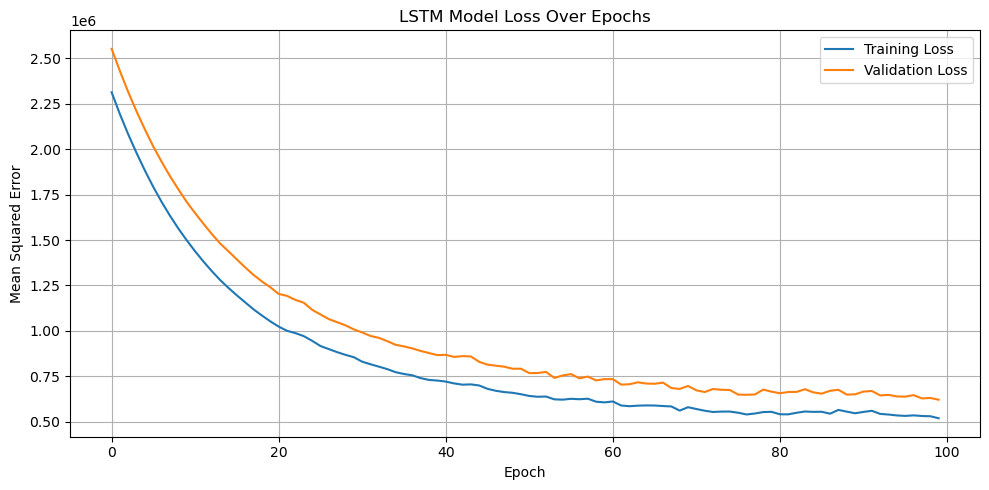

In [112]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

missing_in_test = set(X_train.columns) - set(X_test.columns)
missing_in_train = set(X_test.columns) - set(X_train.columns)

print("Missing in test:", missing_in_test)
print("Missing in train:", missing_in_train)

X_test = X_test[X_train.columns]

X_train_lstm = X_train.to_numpy().astype('float32').reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.to_numpy().astype('float32').reshape((X_test.shape[0], 1, X_test.shape[1]))
Y_train_lstm = np.array(Y_train).astype('float32')
Y_test_lstm = np.array(Y_test).astype('float32')

lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(64, activation='tanh'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

history = lstm_model.fit(
    X_train_lstm, Y_train_lstm,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

mae = mean_absolute_error(Y_test_lstm, y_pred_lstm)
mse = mean_squared_error(Y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_lstm, y_pred_lstm)
n = X_test_lstm.shape[0]
p = X_test_lstm.shape[2]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("\nLSTM Results:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2:", adj_r2)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('my_plot2.png')
plt.show()

#### Forecasting for 2025 

In [94]:
def generate_future_months(df, start_month='2025-04', periods=9):
    accounts = df['account_number'].unique()
    future_dates = pd.date_range(start=start_month, periods=periods, freq='MS').strftime('%Y-%m')
    
    future_data = []
    for acc in accounts:
        for ym in future_dates:
            future_data.append({'account_number': acc, 'year_month': ym})
    
    future_df = pd.DataFrame(future_data)
    return future_df

future_base = generate_future_months(final_data_filtered, start_month='2025-04', periods=9)

latest_features = final_data_filtered.sort_values('year_month').groupby('account_number').tail(1)
latest_features = latest_features.drop(columns=['year_month', 'transaction_amt_sum'])  # Don't include target

future_data = pd.merge(future_base, latest_features, on='account_number', how='left')
future_data = year_month_process(future_data)

X_future = future_data[X_train.columns].copy()
X_future = X_future.replace([np.inf, -np.inf], np.nan).fillna(0).astype('float32')
future_preds_tree = model.predict(X_future)
future_preds_xgb = xgb_model.predict(X_future)
X_future_lstm = X_future.to_numpy().reshape((X_future.shape[0], 1, X_future.shape[1]))
future_preds_lstm = lstm_model.predict(X_future_lstm).flatten()


future_data['pred_dt'] = future_preds_tree
future_data['pred_xgb'] = future_preds_xgb
future_data['pred_lstm'] = future_preds_lstm

forecast_summary = future_data[['account_number', 'year_month', 'pred_dt', 'pred_xgb', 'pred_lstm']]

4018/4018 ━━━━━━━━━━━━━━━━━━━━ 1s 232us/step


In [95]:
forecast_summary

,account_number,year_month,pred_dt,pred_xgb,pred_lstm
0,00gwujJkd597VxLd,2025-04-01,0.00,0.541735,4.809052
1,00gwujJkd597VxLd,2025-05-01,0.00,0.541735,4.809052
2,00gwujJkd597VxLd,2025-06-01,0.00,0.541735,4.809052
3,00gwujJkd597VxLd,2025-07-01,0.00,0.541735,4.809052
4,00gwujJkd597VxLd,2025-08-01,0.00,0.541735,4.809052
...,...,...,...,...,...
128542,zzR9PvG7dY9u5iHU,2025-08-01,585.06,560.758606,597.063232
128543,zzR9PvG7dY9u5iHU,2025-09-01,585.06,560.758606,597.063232
128544,zzR9PvG7dY9u5iHU,2025-10-01,585.06,560.758606,597.063232
128545,zzR9PvG7dY9u5iHU,2025-11-01,585.06,560.758606,597.063232


In [96]:
forecast_summary['year_month'] = pd.to_datetime(forecast_summary['year_month'])

monthly_total_forecast = forecast_summary.groupby('year_month')[['pred_dt', 'pred_xgb', 'pred_lstm']].sum().reset_index()

monthly_total_forecast

/var/folders/fx/rh916w1s3c3dkt_zwv8vhvp80000gn/T/ipykernel_26248/3692128096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_summary['year_month'] = pd.to_datetime(forecast_summary['year_month'])


,year_month,pred_dt,pred_xgb,pred_lstm
0,2025-04-01,16975730.52,17931004.0,18828576.0
1,2025-05-01,16975730.52,17931004.0,18823260.0
2,2025-06-01,16975730.52,17931004.0,18817518.0
3,2025-07-01,16978503.57,19110268.0,18812392.0
4,2025-08-01,16978698.04,17959240.0,18807380.0
5,2025-09-01,16964007.06,17091788.0,18801702.0
6,2025-10-01,16975891.34,17823168.0,18796386.0
7,2025-11-01,16981486.68,17631402.0,18791136.0
8,2025-12-01,16949390.06,17031748.0,18785498.0


In [97]:
monthly_total_actual = final_data_filtered.groupby('year_month')['transaction_amt_sum'].sum().reset_index()

monthly_total_actual.columns = ['year_month', 'total_transaction_amt_sum']

monthly_total_actual[monthly_total_actual['year_month'].dt.year == 2024]

,year_month,total_transaction_amt_sum
106,2024-01,325.00
107,2024-02,-1884.63
108,2024-03,2921505.48
109,2024-04,15174920.14
110,2024-05,16758812.95
111,2024-06,15945660.50
112,2024-07,17238060.11
113,2024-08,17261465.49
114,2024-09,16326334.37
115,2024-10,16612642.68


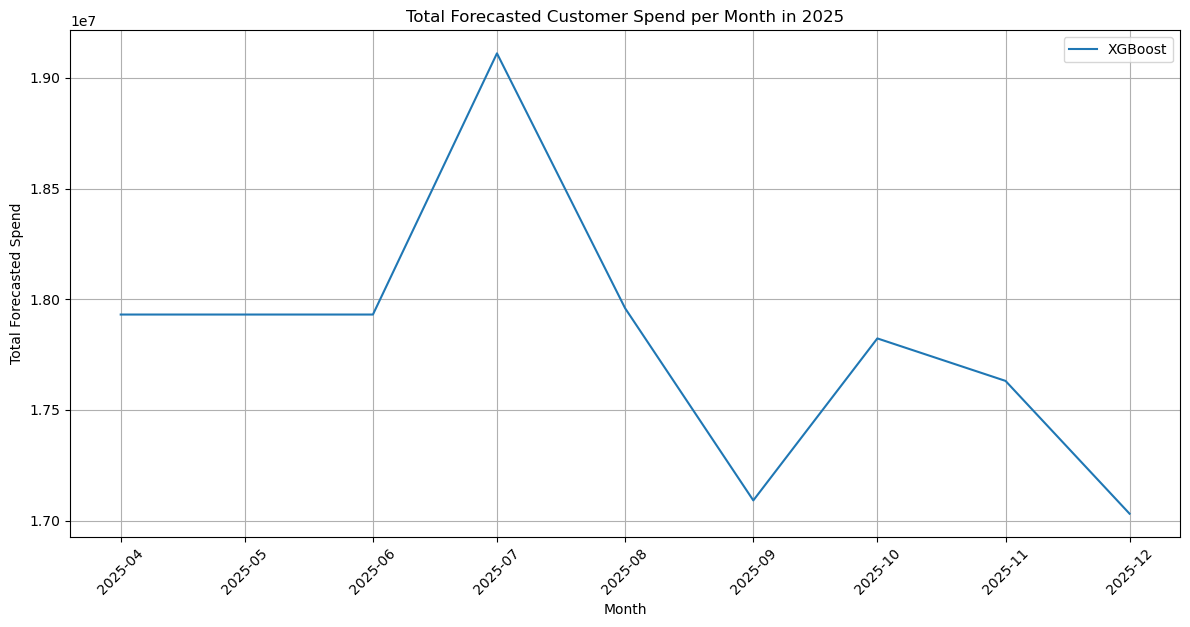

In [98]:
monthly_total_forecast['year_month'] = pd.to_datetime(monthly_total_forecast['year_month'])

monthly_2025 = monthly_total_forecast[monthly_total_forecast['year_month'].dt.year == 2025]

plt.figure(figsize=(12, 6))
plt.plot(monthly_2025['year_month'], monthly_2025['pred_xgb'], label='XGBoost')

plt.title('Total Forecasted Customer Spend per Month in 2025')
plt.xlabel('Month')
plt.ylabel('Total Forecasted Spend')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

In [99]:
monthly_total_actual.dtypes

year_month                   period[M]
total_transaction_amt_sum      float64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


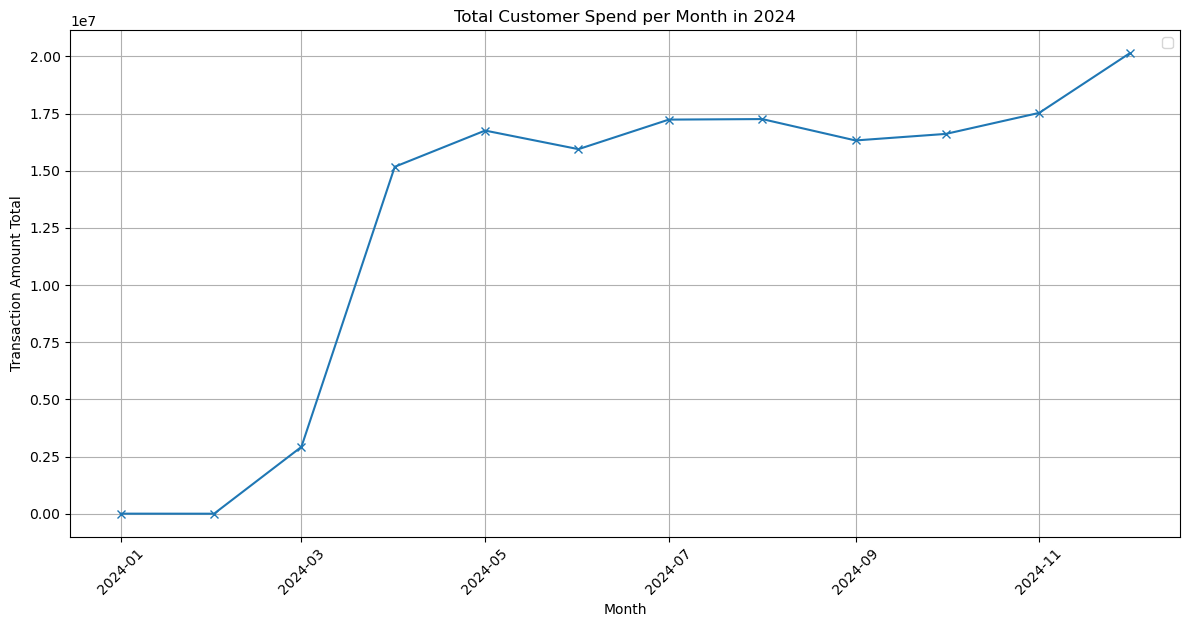

In [100]:
monthly_total_actual['year_month'] = monthly_total_actual['year_month'].dt.to_timestamp()

monthly_2024 = monthly_total_actual[monthly_total_actual['year_month'].dt.year == 2024]

plt.figure(figsize=(12, 6))
plt.plot(monthly_2024['year_month'], monthly_2024['total_transaction_amt_sum'], marker='x')

plt.title('Total Customer Spend per Month in 2024')
plt.xlabel('Month')
plt.ylabel('Transaction Amount Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Clustering for CLI Risk Modeling

In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import silhouette_score

In [102]:
# df_train['year_month'] = pd.to_datetime(df_train['year_month'].astype(str), format='%Y-%m')
# df_test['year_month'] = pd.to_datetime(df_test['year_month'].astype(str), format='%Y-%m')

# df_train['year'] = df_train['year_month'].dt.year
# df_train['month'] = df_train['year_month'].dt.month

# df_test['year'] = df_test['year_month'].dt.year
# df_test['month'] = df_test['year_month'].dt.month

# df_train.drop(columns=['year_month'], inplace=True)
# df_test.drop(columns=['year_month'],  inplace=True)

# 2. Aggregate data at account level
agg_train = df_train.groupby('account_number').agg({
    'transaction_amt_sum': 'sum',
    'transaction_amt_mean': 'mean',
    'transaction_amt_count': 'sum',
    'transaction_amt_std': 'std',
    'is_sale_sum': 'sum',
    'is_return_sum': 'sum',
    'prev_balance': 'mean',
    'return_check_cnt_last_mth': 'sum',
    'return_check_cnt_total': 'sum',
    'rolling_3m_spend': 'sum',
    'rolling_6m_spend': 'sum',
    'spend_change_3m': 'mean',
    'spend_volatility': 'std',
    'cu_cur_balance': 'mean',
    'ca_current_utilz': 'mean',
    'cu_crd_line': 'mean',
    'utilization': 'mean',
    'utilization_change': 'mean',
    'has_fraud_history': 'sum',
    'returned_check_rate': 'mean',
    'months_delinquent': 'mean',
    'max_delinquency': 'max',
    'recent_delinquency': 'mean',
    'segmentation_label': 'first',  
    'card_activation_flag:7': 'sum',
    'card_activation_flag:8': 'sum',
    'account_card_type:PLCC': 'sum',
    'employee_code:Y': 'sum',
    'employee_code:not_employee': 'sum'
}).reset_index()

agg_test = df_test.groupby('account_number').agg({
    'transaction_amt_sum': 'sum',
    'transaction_amt_mean': 'mean',
    'transaction_amt_count': 'sum',
    'transaction_amt_std': 'std',
    'is_sale_sum': 'sum',
    'is_return_sum': 'sum',
    'prev_balance': 'mean',
    'return_check_cnt_last_mth': 'sum',
    'return_check_cnt_total': 'sum',
    'rolling_3m_spend': 'sum',
    'rolling_6m_spend': 'sum',
    'spend_change_3m': 'mean',
    'spend_volatility': 'std',
    'cu_cur_balance': 'mean',
    'ca_current_utilz': 'mean',
    'cu_crd_line': 'mean',
    'utilization': 'mean',
    'utilization_change': 'mean',
    'has_fraud_history': 'sum',
    'returned_check_rate': 'mean',
    'months_delinquent': 'mean',
    'max_delinquency': 'max',
    'recent_delinquency': 'mean',
    'segmentation_label': 'first',  
    'card_activation_flag:7': 'sum',
    'card_activation_flag:8': 'sum',
    'account_card_type:PLCC': 'sum',
    'employee_code:Y': 'sum',
    'employee_code:not_employee': 'sum'
}).reset_index()

agg_train.replace([np.inf, -np.inf], np.nan, inplace=True)
agg_test.replace([np.inf, -np.inf], np.nan, inplace=True)

agg_train.fillna(0, inplace=True)
agg_test.fillna(0, inplace=True)

scaler = StandardScaler()

train_scaled = scaler.fit_transform(agg_train.drop(['account_number', 'segmentation_label'], axis=1))
test_scaled = scaler.transform(agg_test.drop(['account_number', 'segmentation_label'], axis=1))


In [103]:
k_values = [i for i in range(2, 21)]#store a list of k values 
inertia = [] #  storing inertia values for each K value. 
ss = []
for k in k_values:
    kmeans = KMeans(n_clusters= k , init='k-means++', random_state=42, n_init= 1)
    kmeans.fit(train_scaled)
    inertia.append(kmeans.inertia_)
    ss.append(silhouette_score(train_scaled,kmeans.labels_))

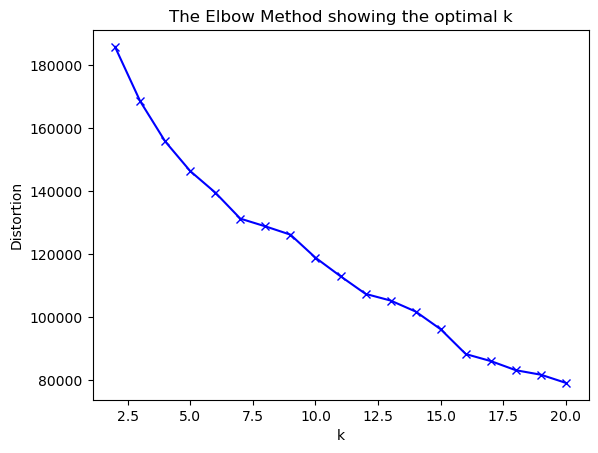

In [104]:
#plot inertia vs k_values
plt.plot(k_values, inertia, 'bx-') # create line plot

plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

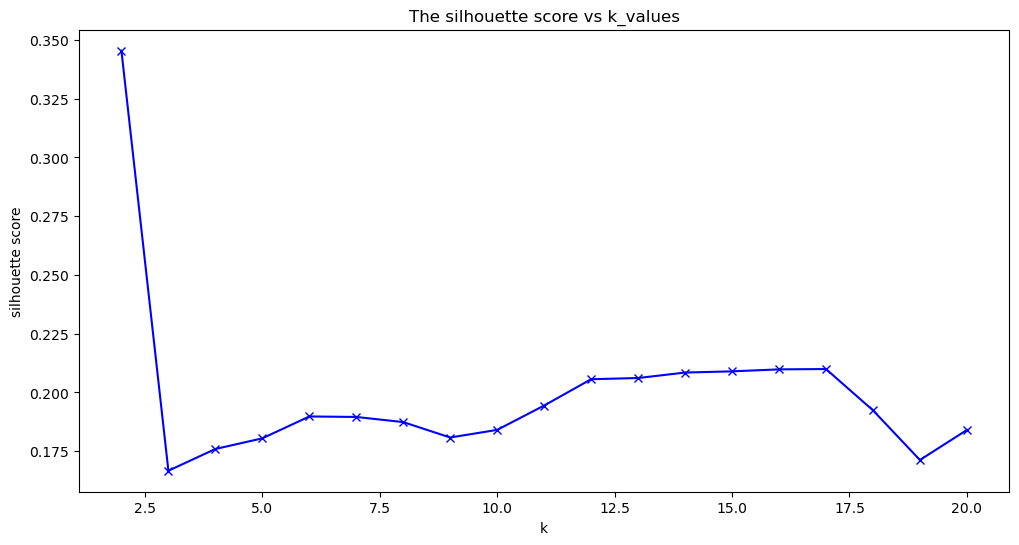

In [105]:
#plot silhouette score vs k_values
plt.figure(figsize=(12,6))
#plot silhouette score vs k_values
plt.plot(k_values, ss, 'bx-') # create line plot

plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('The silhouette score vs k_values')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=8, random_state=42)  # Choose optimal n_clusters (k)
agg_train['cluster'] = kmeans.fit_predict(train_scaled)

In [107]:
agg_test['cluster'] = kmeans.predict(test_scaled)

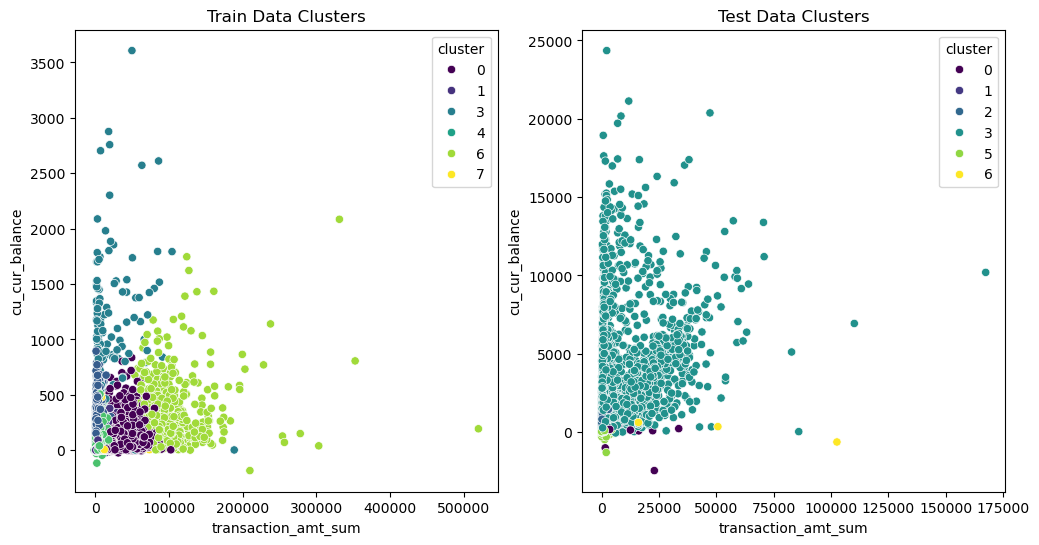

In [108]:
plt.figure(figsize=(12, 6))

# Plot Train Data Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(data=agg_train, x='transaction_amt_sum', y='cu_cur_balance', hue='cluster', palette='viridis')
plt.title('Train Data Clusters')

# Plot Test Data Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=agg_test, x='transaction_amt_sum', y='cu_cur_balance', hue='cluster', palette='viridis')
plt.title('Test Data Clusters')

plt.show()


In [109]:
agg_train.dtypes
agg_train = agg_train.drop('account_number', axis=1)

In [110]:
df_summary_train = agg_train.groupby("cluster").agg("mean")

df_summary_train["cluster"] = df_summary_train.index

df_summary_train

,transaction_amt_sum,transaction_amt_mean,transaction_amt_count,transaction_amt_std,is_sale_sum,is_return_sum,prev_balance,return_check_cnt_last_mth,return_check_cnt_total,rolling_3m_spend,rolling_6m_spend,spend_change_3m,spend_volatility,cu_cur_balance,ca_current_utilz,cu_crd_line,utilization,utilization_change,has_fraud_history,returned_check_rate,months_delinquent,max_delinquency,recent_delinquency,segmentation_label,card_activation_flag:7,card_activation_flag:8,account_card_type:PLCC,employee_code:Y,employee_code:not_employee,cluster
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39826.970912,37.914151,356.192475,178.109100,334.911722,7.881331,2112.883980,5638.755427,1.981187,37025.850509,35294.290821,-0.014521,832.260606,115.150837,0.816808,935.359122,0.008272,-0.000080,0.045586,1.556177,0.219874,0.169320,0.004416,3.002171,0.000000,2.034732,0.711288,0.0,2.829233,0
1,2618.486452,9.304469,27.490042,28.814148,18.668828,1.126447,862.246650,8833.334414,0.591478,2821.635860,2935.442607,0.044378,71.041519,24.027448,0.567034,115.652580,0.005986,-0.000019,0.225104,3.994959,6.222970,0.382585,0.011533,3.004169,0.454377,8.541454,73.492821,0.0,89.724409,1
2,2708.303346,51.833362,28.402214,51.705721,15.975400,0.467405,1856.202654,2040.560886,0.817958,2842.998938,2875.475647,0.339832,129.766881,233.379558,8.154889,376.948391,0.083578,-0.000746,0.015990,27.952303,4.058788,0.250923,0.020424,3.001230,0.838868,0.901599,10.788438,0.0,20.428044,2
3,23134.811912,232.473790,119.713235,296.661820,104.514706,1.926471,7690.544879,1864.272059,0.654412,22757.579571,21945.730735,0.704335,922.443084,1091.555562,8.318081,1785.206650,0.083394,0.001985,0.000000,24.321575,3.450215,0.139706,0.009299,3.000000,0.580882,0.470588,8.080882,0.0,11.213235,3
4,10024.140000,16.030369,137.000000,32.319161,64.000000,0.000000,266.904222,4455.000000,0.000000,8762.750000,8065.634333,0.140527,185.859896,17.022444,0.800000,88.888889,0.008511,-0.002728,0.000000,2.581566,0.355556,1.000000,0.022222,3.000000,0.000000,0.000000,0.000000,45.0,0.000000,4
5,2891.103198,32.259722,28.365648,45.850672,19.100998,0.835723,847.671643,3356.788342,1.118454,3119.167083,3249.090261,0.038278,111.195259,37.599093,0.877790,431.172963,0.009672,0.000140,0.124065,13.088742,4.779622,0.165835,0.007809,3.004364,0.541771,2.072319,13.301122,0.0,29.334788,5
6,105008.231253,71.818116,672.231325,348.707809,635.995181,19.204819,4003.898820,3895.195181,5.455422,97298.267153,92352.054918,0.466494,2336.836646,356.219418,2.142230,1472.358258,0.021519,-0.000594,0.000000,0.921107,0.121624,0.093976,0.002659,3.000000,0.000000,0.860241,0.342169,0.0,1.012048,6
7,10802.428446,14.585206,85.574324,65.052085,72.054054,2.493243,1979.555947,5228.013514,100.229730,10250.612095,9935.791958,0.118776,245.985971,53.375017,0.836256,200.631710,0.008560,0.000106,0.000000,2.440659,4.615424,0.581081,0.016229,3.000000,0.000000,9.608108,54.479730,0.0,70.209459,7


In [111]:
df_summary_train

,transaction_amt_sum,transaction_amt_mean,transaction_amt_count,transaction_amt_std,is_sale_sum,is_return_sum,prev_balance,return_check_cnt_last_mth,return_check_cnt_total,rolling_3m_spend,rolling_6m_spend,spend_change_3m,spend_volatility,cu_cur_balance,ca_current_utilz,cu_crd_line,utilization,utilization_change,has_fraud_history,returned_check_rate,months_delinquent,max_delinquency,recent_delinquency,segmentation_label,card_activation_flag:7,card_activation_flag:8,account_card_type:PLCC,employee_code:Y,employee_code:not_employee,cluster
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,39826.970912,37.914151,356.192475,178.109100,334.911722,7.881331,2112.883980,5638.755427,1.981187,37025.850509,35294.290821,-0.014521,832.260606,115.150837,0.816808,935.359122,0.008272,-0.000080,0.045586,1.556177,0.219874,0.169320,0.004416,3.002171,0.000000,2.034732,0.711288,0.0,2.829233,0
1,2618.486452,9.304469,27.490042,28.814148,18.668828,1.126447,862.246650,8833.334414,0.591478,2821.635860,2935.442607,0.044378,71.041519,24.027448,0.567034,115.652580,0.005986,-0.000019,0.225104,3.994959,6.222970,0.382585,0.011533,3.004169,0.454377,8.541454,73.492821,0.0,89.724409,1
2,2708.303346,51.833362,28.402214,51.705721,15.975400,0.467405,1856.202654,2040.560886,0.817958,2842.998938,2875.475647,0.339832,129.766881,233.379558,8.154889,376.948391,0.083578,-0.000746,0.015990,27.952303,4.058788,0.250923,0.020424,3.001230,0.838868,0.901599,10.788438,0.0,20.428044,2
3,23134.811912,232.473790,119.713235,296.661820,104.514706,1.926471,7690.544879,1864.272059,0.654412,22757.579571,21945.730735,0.704335,922.443084,1091.555562,8.318081,1785.206650,0.083394,0.001985,0.000000,24.321575,3.450215,0.139706,0.009299,3.000000,0.580882,0.470588,8.080882,0.0,11.213235,3
4,10024.140000,16.030369,137.000000,32.319161,64.000000,0.000000,266.904222,4455.000000,0.000000,8762.750000,8065.634333,0.140527,185.859896,17.022444,0.800000,88.888889,0.008511,-0.002728,0.000000,2.581566,0.355556,1.000000,0.022222,3.000000,0.000000,0.000000,0.000000,45.0,0.000000,4
5,2891.103198,32.259722,28.365648,45.850672,19.100998,0.835723,847.671643,3356.788342,1.118454,3119.167083,3249.090261,0.038278,111.195259,37.599093,0.877790,431.172963,0.009672,0.000140,0.124065,13.088742,4.779622,0.165835,0.007809,3.004364,0.541771,2.072319,13.301122,0.0,29.334788,5
6,105008.231253,71.818116,672.231325,348.707809,635.995181,19.204819,4003.898820,3895.195181,5.455422,97298.267153,92352.054918,0.466494,2336.836646,356.219418,2.142230,1472.358258,0.021519,-0.000594,0.000000,0.921107,0.121624,0.093976,0.002659,3.000000,0.000000,0.860241,0.342169,0.0,1.012048,6
7,10802.428446,14.585206,85.574324,65.052085,72.054054,2.493243,1979.555947,5228.013514,100.229730,10250.612095,9935.791958,0.118776,245.985971,53.375017,0.836256,200.631710,0.008560,0.000106,0.000000,2.440659,4.615424,0.581081,0.016229,3.000000,0.000000,9.608108,54.479730,0.0,70.209459,7


- 0: Low spend, high returns
- 1: High spend, high transactions
- 2: Moderate spend, steady balance
- 3: High volatility, high utilization
- 4: Very high spend, extreme volatility
- 5: Medium spend, low returns
- 6: Very high spend, frequent transactions
- 7: Moderate spend, high delinquency